Pre-processing, in a nutshell, is the essential step of cleaning and enhancing data before analyzing it. It serves two main purposes:

First, it helps in **removing noise**, which means getting rid of any unwanted or distracting elements in the data. For instance, it eliminates issues like light scatter, baseline drift, and background effects, which can distort the accuracy of the analysis.

Second, pre-processing aims to **improve data representation**. This involves making adjustments to the data so that it's better suited for the specific analysis techniques to be used. For example, it might involve dealing with non-linearities, shifts, and making the data more easily understandable and useful for the analysis process.

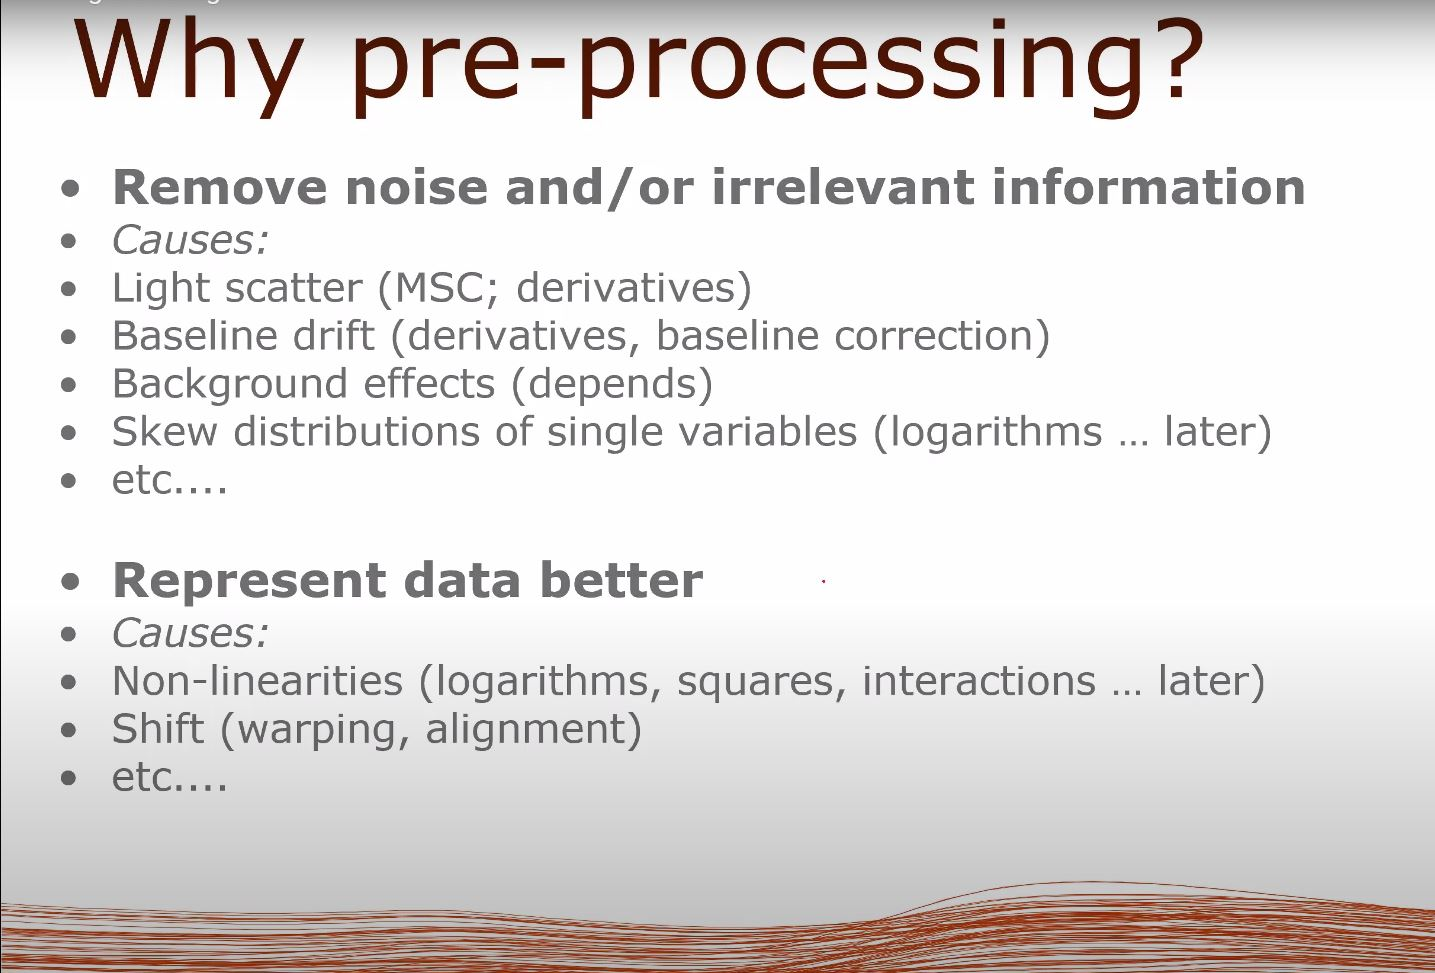

**Skewness** is a statistical measure that quantifies the asymmetry of the probability distribution of a real-valued random variable. In simpler terms, it measures the extent to which the data in a dataset deviates from a perfectly symmetric (normal or Gaussian) distribution. Skewness is a crucial concept in statistics, particularly when dealing with probability distributions and datasets. There are three main classifications of skewness:

1. **Negative Skewness (Left-Skewed)**:
   - **Definition**: Negative skewness indicates that the data is skewed to the left, with the tail on the left side of the distribution longer or fatter than the right tail.
   - **Example**: In a dataset of household incomes, most people earn relatively high incomes, but a few earn very low incomes. The distribution is left-skewed because it extends more to the left due to the low-income outliers.

2. **Positive Skewness (Right-Skewed)**:
   - **Definition**: Positive skewness indicates that the data is skewed to the right, with the tail on the right side of the distribution longer or fatter than the left tail.
   - **Example**: In a dataset of test scores, most students score relatively low, but a few students score very high. The distribution is right-skewed because it extends more to the right due to the high-score outliers.

3. **Zero Skewness (Symmetric)**:
   - **Definition**: A perfectly symmetric distribution has zero skewness, meaning that the left and right tails are equally balanced.
   - **Example**: In a dataset of heights for a well-mixed sample of adults, the distribution is roughly symmetric, with no significant skewness.

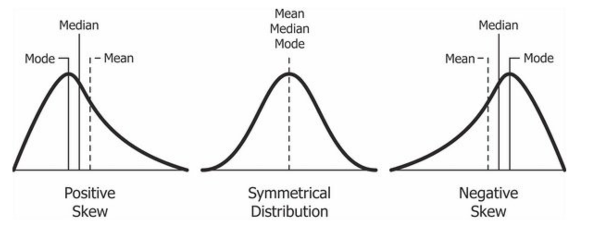

   

Skewness is typically measured using the skewness coefficient or index, which quantifies the degree and direction of skewness. A positive skewness index indicates right-skewness, while a negative skewness index indicates left-skewness. A skewness index of zero indicates a perfectly symmetric distribution.

To remove skewness in data, we typically use a technique called "centering" and "normalizing." Centering involves shifting the data so that its mean (average) is at or near zero, while normalizing involves scaling the data to have a standard deviation of 1. This helps make the data more symmetric and reduces the impact of extreme values, often resulting in a more normal distribution.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn. svm import SVC

# **Data Handeling**

Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AI_Project/house_votes.csv')
df.head()

index       party infants water budget physician salvador religious  \
0      0  republican       0     1      0         1        1         1   
1      1  republican       0     1      0         1        1         1   
2      2    democrat       ?     1      1         ?        1         1   
3      3    democrat       0     1      1         0        ?         1   
4      4    democrat       1     1      1         0        1         1   

  satellite aid missile immigration synfuels education superfund crime  \
0         0   0       0           1        ?         1         1     1   
1         0   0       0           0        0         1         1     1   
2         0   0       0           0        1         0         1     1   
3         0   0       0           0        1         0         1     0   
4         0   0       0           0        1         ?         1     1   

  duty_free_exports eaa_rsa  
0                 0       1  
1                 0       ?  
2                 0       0  
3                 0       1  
4                 1       1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              435 non-null    int64 
 1   party              435 non-null    object
 2   infants            435 non-null    object
 3   water              435 non-null    object
 4   budget             435 non-null    object
 5   physician          435 non-null    object
 6   salvador           435 non-null    object
 7   religious          435 non-null    object
 8   satellite          435 non-null    object
 9   aid                435 non-null    object
 10  missile            435 non-null    object
 11  immigration        435 non-null    object
 12  synfuels           435 non-null    object
 13  education          435 non-null    object
 14  superfund          435 non-null    object
 15  crime              435 non-null    object
 16  duty_free_exports  435 non-null    object
 1

In [ ]:
del df["index"]

In [ ]:
df["party"] = df["party"].replace({"republican" : 1, "democrat" : 0})

# Data Handling and preparation

In [ ]:
df[df == "?"] = np.nan

In [ ]:
df.isnull().sum()

party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64

In [ ]:
df.shape

(435, 17)

# **Support Vector Machine**

In [ ]:
X = df[df.columns.drop("party")]
Y = df[ "party"]

In [ ]:
# Setup the pipeline steps: steps
steps = [('imputation', SimpleImputer (missing_values=np.nan, strategy='most_frequent')),
('SVM', SVC())]
# Create the pipeline: pipeline
pipeline = Pipeline(steps)
# Create training and test sets
X_train, X_test, y_train, Y_test = train_test_split(X,
                                                   Y,
                                                   test_size = 0.3,
                                                   random_state= 42)
# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)
# Predict the labels of the test set
Y_pred = pipeline.predict(X_test)
pd.DataFrame({"Actual": Y_test, "Predicted" : Y_pred})[0:20]

Actual  Predicted
280       0          0
78        0          0
113       1          1
253       1          1
324       1          1
327       1          1
291       0          0
82        1          1
365       0          0
401       1          1
379       1          1
75        0          1
426       0          0
393       1          0
132       1          1
76        0          0
430       1          1
94        0          0
73        1          1
417       0          0

In [ ]:
score = accuracy_score(Y_test, Y_pred)
score

0.9618320610687023

In [ ]:
print(confusion_matrix(Y_test, Y_pred))

[[82  3]
 [ 2 44]]


In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        85
           1       0.94      0.96      0.95        46

    accuracy                           0.96       131
   macro avg       0.96      0.96      0.96       131
weighted avg       0.96      0.96      0.96       131



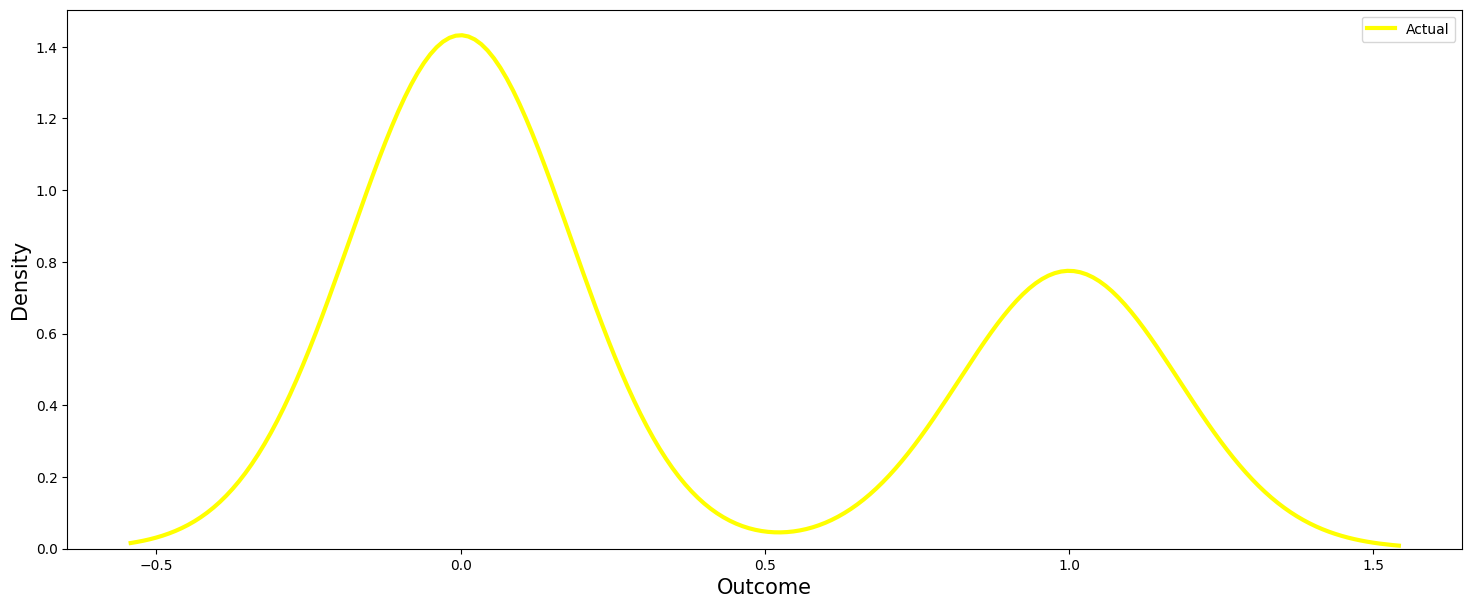

In [ ]:
plt.figure(figsize = (18, 7))
sns. kdeplot (data = df, x = Y_test, label = "Actual", linewidth = 3, color = "yellow")
sns. kdeplot (X = Y_pred, label = "Predicted", linewidth = 3, color = "orange")
plt.xlabel ("Outcome", size = 15)
plt.ylabel ("Density", size = 15)
plt.legend()
plt. show()

Centering and Scaling

Import Red Juice Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AI_Project/winequality-red.csv' , delimiter =";")
df.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

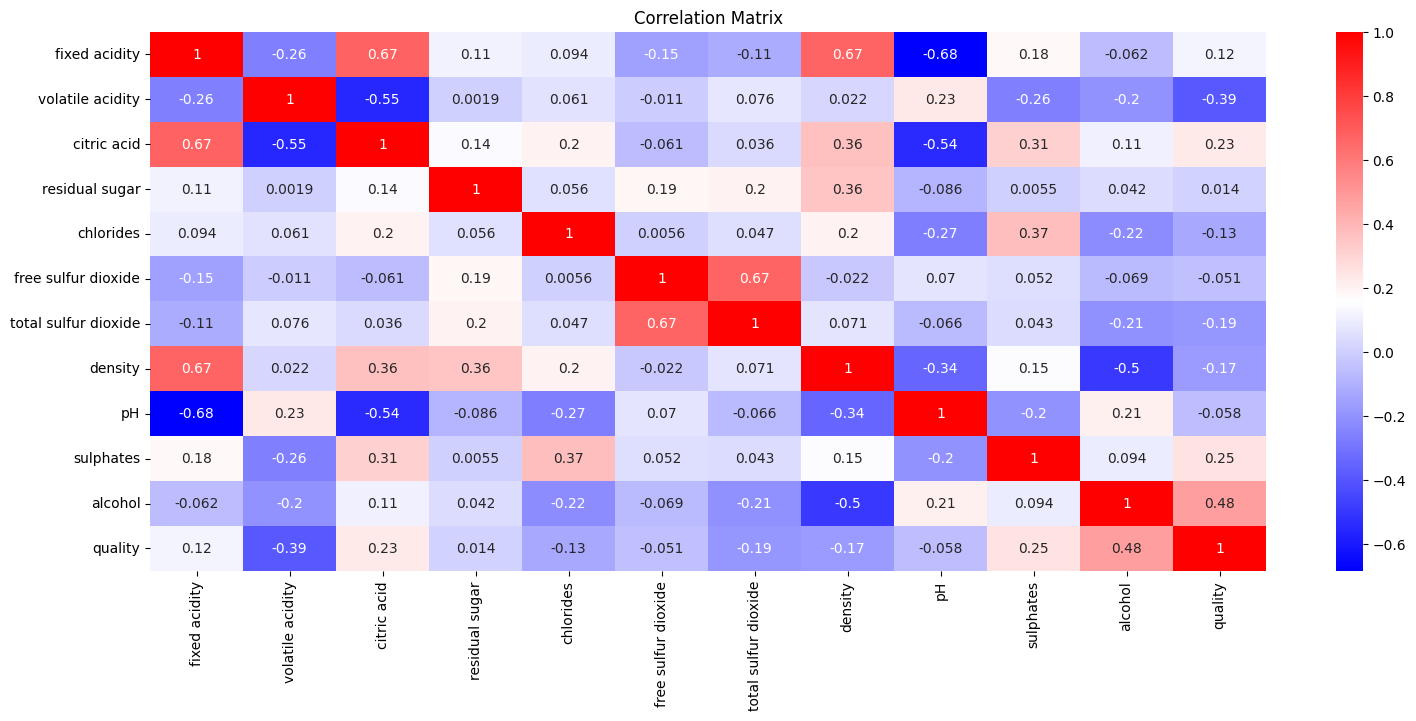

In [ ]:
#Correlation
plt. figure(figsize = (18, 7))
correlation = df.corr()
sns. heatmap(correlation, cmap = "bwr", annot = True)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
X= df[df.columns.drop("quality")]
y= df["quality"]

In [ ]:
steps = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=21)
knn_scaled = pipeline.fit(X_train, y_train)
Y_pred = pipeline.predict(X_test)

# Create a DataFrame with correct column names
results = pd.DataFrame({"Actual": y_test, "Predicted": Y_pred})

# Display the first 20 rows
print(results.head(20))

      Actual  Predicted
275        6          6
551        6          7
893        5          5
1535       6          5
494        6          6
1466       7          5
41         4          5
565        5          6
296        5          5
140        5          5
535        6          5
1340       6          6
216        5          6
278        8          7
46         5          5
1072       6          6
25         5          5
1272       5          5
725        5          6
1434       6          6


In [ ]:
score= accuracy_score(y_test, Y_pred)
score

0.5375

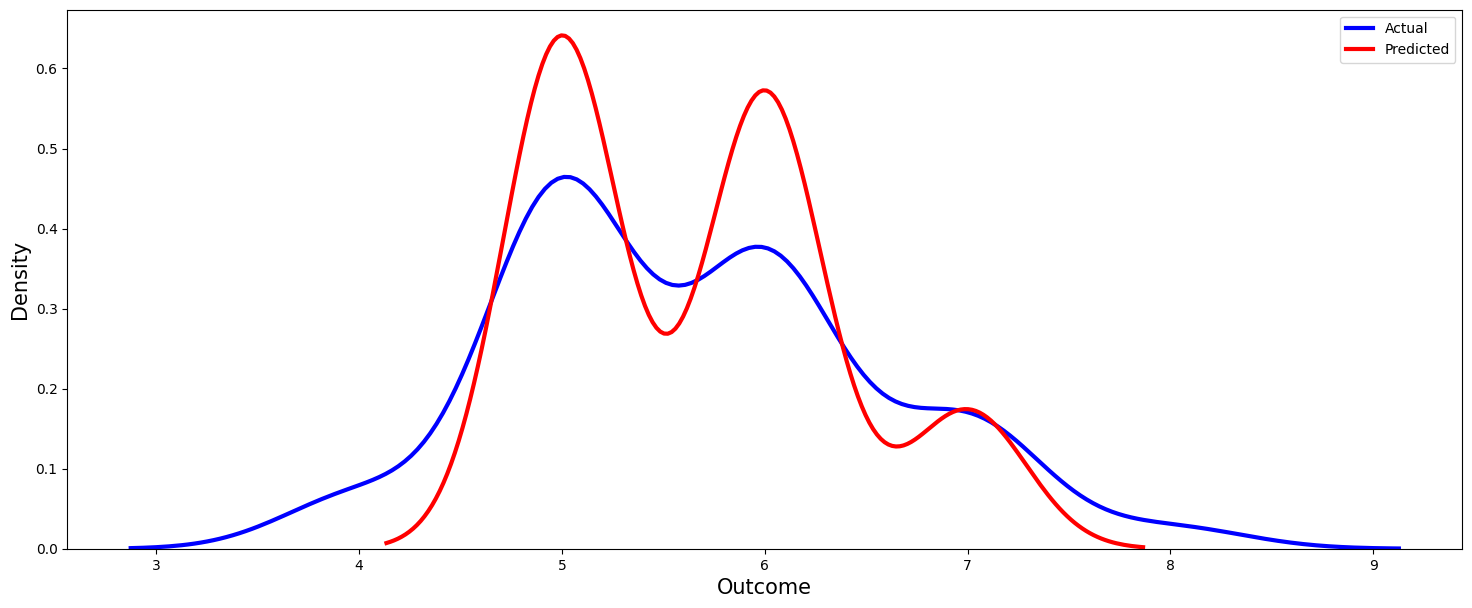

In [ ]:
plt.figure(figsize = (18, 7))
sns. kdeplot (data = df, x= y_test, label = "Actual", linewidth = 3, color = "blue")
sns. kdeplot(x = Y_pred, label = "Predicted", linewidth = 3, color =
"red" )
plt. xlabel ("Outcome", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()

# Cross Validation and Scaling in a pipeline

In [ ]:
X = df[df.columns.drop("quality")]
y = df[ "quality"]

In [ ]:
# Setup the pipeline steps
steps = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]

# Create the pipeline
pipeline = Pipeline(steps)

# Define the hyperparameters to search
parameters = {"knn__n_neighbors": np.arange(1, 50)}  # Use double underscores "__"

# Create train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=21)

# Initialize GridSearchCV
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit the model
cv.fit(x_train, y_train)

# Make predictions
yhat = cv.predict(x_test)

# Create a DataFrame for results
result_df = pd.DataFrame({"Actual": y_test, "Predicted": yhat})

# Display the first 20 rows of the DataFrame
print(result_df.head(20))

      Actual  Predicted
275        6          6
551        6          6
893        5          5
1535       6          5
494        6          6
1466       7          7
41         4          5
565        5          5
296        5          5
140        5          5
535        6          6
1340       6          6
216        5          5
278        8          7
46         5          5
1072       6          6
25         5          5
1272       5          6
725        5          5
1434       6          6


In [ ]:
cv.best_params_

{'knn__n_neighbors': 1}

In [ ]:
score = accuracy_score(y_test , yhat)
score

0.62

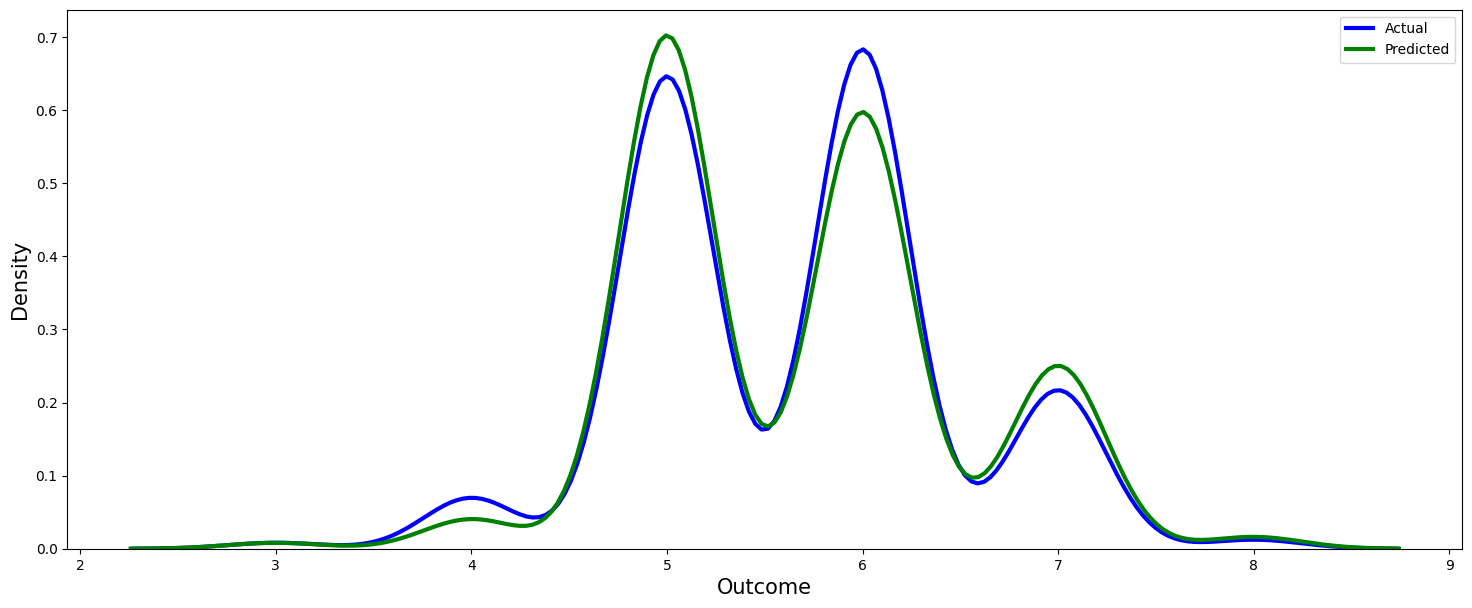

In [ ]:
plt.figure(figsize = (18, 7))
sns. kdeplot(data = df, x= y_test, label = "Actual", linewidth = 3, color ="blue")
sns. kdeplot(x = yhat, label =
"Predicted", linewidth= 3, color ="green" )
plt.xlabel("Outcome", size = 15)
plt.ylabel("Density", size = 15)
plt. legend()
plt. show()

# Import White Juice Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AI_Project/winequality-white.csv' , delimiter =";")
df= df.round(2)
df.head(20)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.0              0.27         0.36           20.70       0.04   
1             6.3              0.30         0.34            1.60       0.05   
2             8.1              0.28         0.40            6.90       0.05   
3             7.2              0.23         0.32            8.50       0.06   
4             7.2              0.23         0.32            8.50       0.06   
5             8.1              0.28         0.40            6.90       0.05   
6             6.2              0.32         0.16            7.00       0.04   
7             7.0              0.27         0.36           20.70       0.04   
8             6.3              0.30         0.34            1.60       0.05   
9             8.1              0.22         0.43            1.50       0.04   
10            8.1              0.27         0.41            1.45       0.03   
11            8.6              0.23         0.40            4.20       0.04   
12            7.9              0.18         0.37            1.20       0.04   
13            6.6              0.16         0.40            1.50       0.04   
14            8.3              0.42         0.62           19.25       0.04   
15            6.6              0.17         0.38            1.50       0.03   
16            6.3              0.48         0.04            1.10       0.05   
17            6.2              0.66         0.48            1.20       0.03   
18            7.4              0.34         0.42            1.10       0.03   
19            6.5              0.31         0.14            7.50       0.04   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  45.0                 170.0     1.00  3.00       0.45   
1                  14.0                 132.0     0.99  3.30       0.49   
2                  30.0                  97.0     1.00  3.26       0.44   
3                  47.0                 186.0     1.00  3.19       0.40   
4                  47.0                 186.0     1.00  3.19       0.40   
5                  30.0                  97.0     1.00  3.26       0.44   
6                  30.0                 136.0     0.99  3.18       0.47   
7                  45.0                 170.0     1.00  3.00       0.45   
8                  14.0                 132.0     0.99  3.30       0.49   
9                  28.0                 129.0     0.99  3.22       0.45   
10                 11.0                  63.0     0.99  2.99       0.56   
11                 17.0                 109.0     0.99  3.14       0.53   
12                 16.0                  75.0     0.99  3.18       0.63   
13                 48.0                 143.0     0.99  3.54       0.52   
14                 41.0                 172.0     1.00  2.98       0.67   
15                 28.0                 112.0     0.99  3.25       0.55   
16                 30.0                  99.0     0.99  3.24       0.36   
17                 29.0                  75.0     0.99  3.33       0.39   
18                 17.0                 171.0     0.99  3.12       0.53   
19                 34.0                 133.0     1.00  3.22       0.50   

    alcohol  quality  
0       8.8        6  
1       9.5        6  
2      10.1        6  
3       9.9        6  
4       9.9        6  
5      10.1        6  
6       9.6        6  
7       8.8        6  
8       9.5        6  
9      11.0        6  
10     12.0        5  
11      9.7        5  
12     10.8        5  
13     12.4        7  
14      9.7        5  
15     11.4        7  
16      9.6        6  
17     12.8        8  
18     11.3        6  
19      9.5        5

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278236     0.334192        6.391415   
std         0.843868          0.100834     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045839            35.308085            138.360657     0.993738   
std       0.022066            17.007137             42.498065     0.004889   
min       0.010000             2.000000              9.000000     0.990000   
25%       0.040000            23.000000            108.000000     0.990000   
50%       0.040000            34.000000            134.000000     0.990000   
75%       0.050000            46.000000            167.000000     1.000000   
max       0.350000           289.000000            440.000000     1.040000   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514259     5.877909  
std       0.151001     0.114126     1.230618     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

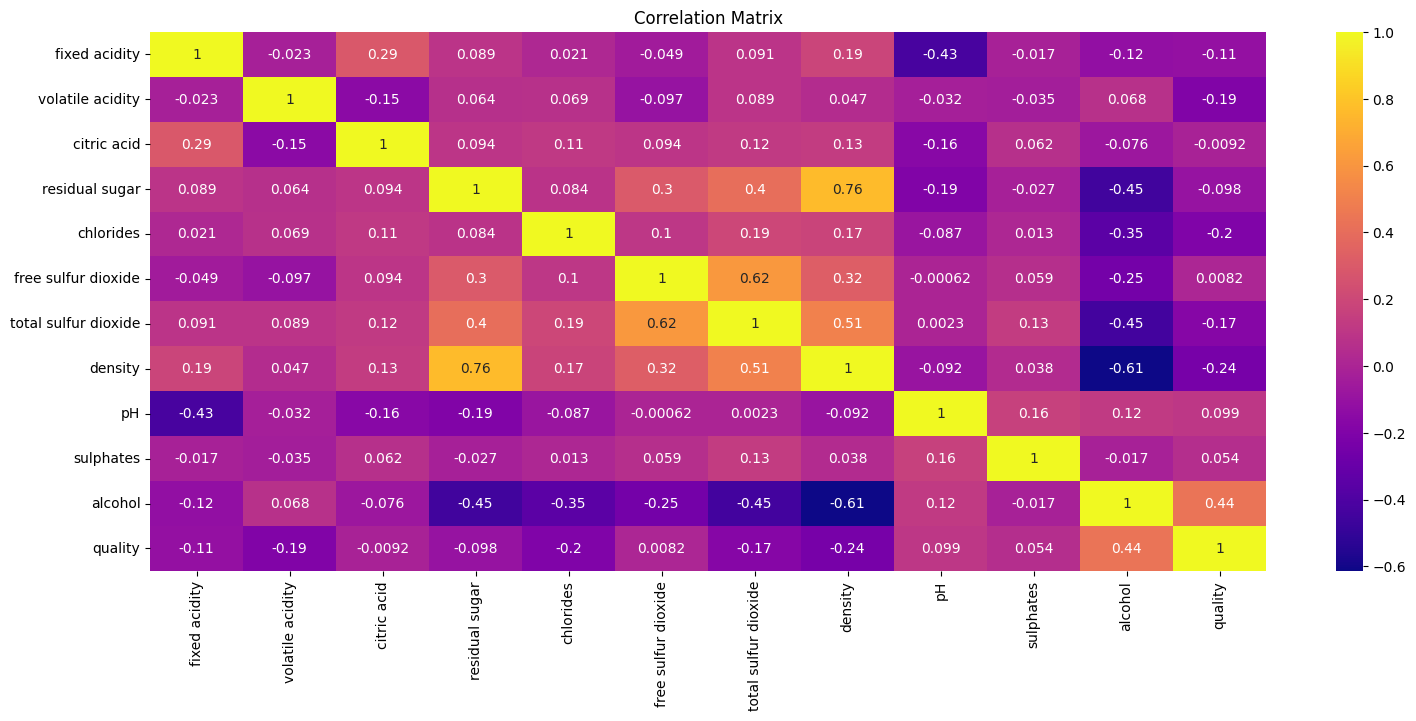

In [ ]:
#Correlation
plt.figure(figsize = (18, 7))
correlation = df.corr()
sns. heatmap(correlation, cmap = "plasma", annot = True)
plt.title("Correlation Matrix")
plt. show()

**Centering and scaling in a pipeline**

In [ ]:
X = df[df.columns.drop("quality")]
y = df[ "quality"]

In [ ]:
# Setup the pipeline steps: steps
steps = [("scaler", StandardScaler()),
("knn", KNeighborsClassifier())]
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)
# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(x_train, y_train)
# Prediction
yhat = knn_scaled.predict(x_test)
pd.DataFrame ({"Actual": y_test, "Predicted": yhat})[0:20]

Actual  Predicted
4656       7          6
3659       8          6
907        8          7
4352       5          5
3271       7          7
4632       6          6
2244       5          5
1924       4          5
3801       6          6
2634       5          5
2827       7          6
79         5          5
350        7          7
1370       6          5
4480       5          6
3783       5          5
2890       8          6
3193       5          5
1281       7          7
4388       6          5

In [ ]:
score = accuracy_score(y_test, yhat)
score

0.5469387755102041

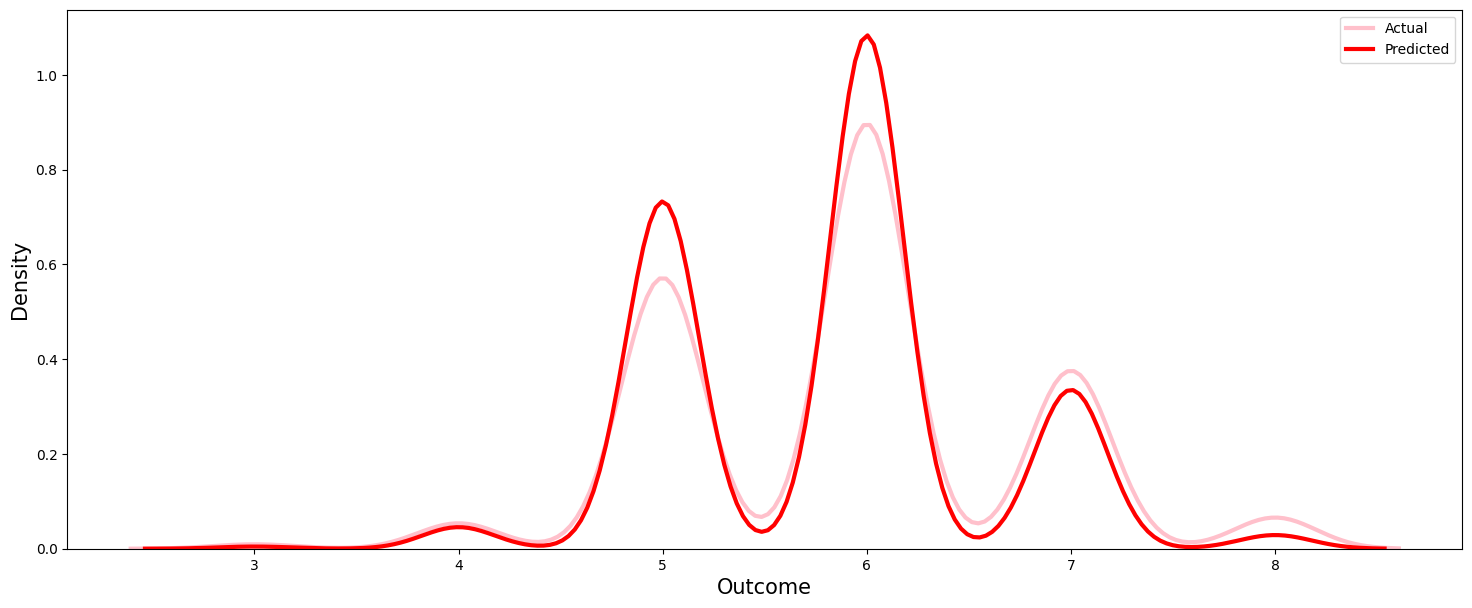

In [ ]:
plt.figure(figsize = (18, 7))
sns.kdeplot (data = df, x= y_test, label = "Actual", linewidth = 3, color = "pink")
sns.kdeplot(x = yhat, label = "Predicted", linewidth = 3, color = "red")
plt.xlabel ("Outcome", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()

In [ ]:
X = df[df.columns.drop("quality")]
Y = df[ "quality"]

In [ ]:
# Setup the pipeline
steps = [("scaler", StandardScaler()),("SVM", SVC())]
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {"SVM__C": [1, 10, 100],
              "SVM__gamma": [0.1, 0.01]}
# Create train and test sets
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size = 0.2,
                                                    random_state = 21)
# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, param_grid = parameters, cv = 3)
# Fit it to training set
cv.fit(x_train, y_train)
# Predict the labels of the test set: Y_pred
Y_pred = cv.predict(x_test)
pd.DataFrame({"Actual": y_test, "Predicted": Y_pred})[0:20]

Actual  Predicted
1555       7          6
3507       7          7
3138       6          6
1204       6          6
4205       6          6
1832       7          7
1984       8          6
659        4          5
1377       6          6
786        6          5
705        5          6
1543       6          6
1932       6          5
216        5          6
19         5          5
4491       6          7
3329       6          6
38         5          5
1058       6          6
3813       5          6

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Sample data
data = np.array([[1.0, 2.0, 3.0],
                 [4.0, 5.0, 6.0],
                 [7.0, 8.0, 9.0]])

# Standardization
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)

# Normalization
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)

print("Standardized Data:")
print(standardized_data)

print("\nNormalized Data:")
print(normalized_data)

Standardized Data:
[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]

Normalized Data:
[[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]


# ***Normalisation***

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AI_Project/wine_data.csv',header=None,usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13])
df.columns=['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of Ash', 'Magnesium', 'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols', 'Proanthocyanins', 'Color Intensity', 'Hue', 'OD280/OD315 of diluted wines',
'Proline']

Characteristic	Normalization (Min-Max Scaling)	Standardization (Z-score Scaling)
Range of Transformed Values	[0, 1]	Centered around 0, positive and negative values
Handling Outliers	Sensitive to outliers	More robust to outliers
Distribution Assumption	Assumes a uniform distribution	Assumes a normal (Gaussian) distribution
Interpretability	Preserves original data range	Transforms data into standard normal distribution


In [ ]:
df

Class label  Alcohol  Malic acid   Ash  Alcalinity of Ash  Magnesium  \
0              1    14.23        1.71  2.43               15.6        127   
1              1    13.20        1.78  2.14               11.2        100   
2              1    13.16        2.36  2.67               18.6        101   
3              1    14.37        1.95  2.50               16.8        113   
4              1    13.24        2.59  2.87               21.0        118   
..           ...      ...         ...   ...                ...        ...   
173            3    13.71        5.65  2.45               20.5         95   
174            3    13.40        3.91  2.48               23.0        102   
175            3    13.27        4.28  2.26               20.0        120   
176            3    13.17        2.59  2.37               20.0        120   
177            3    14.13        4.10  2.74               24.5         96   

     Total Phenols  Flavanoids  Nonflavanoid Phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1             2.65        2.76                  0.26             1.28   
2             2.80        3.24                  0.30             2.81   
3             3.85        3.49                  0.24             2.18   
4             2.80        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.56             1.35   

     Color Intensity   Hue  OD280/OD315 of diluted wines  Proline  
0               5.64  1.04                          3.92     1065  
1               4.38  1.05                          3.40     1050  
2               5.68  1.03                          3.17     1185  
3               7.80  0.86                          3.45     1480  
4               4.32  1.04                          2.93      735  
..               ...   ...                           ...      ...  
173             7.70  0.64                          1.74      740  
174             7.30  0.70                          1.56      750  
175            10.20  0.59                          1.56      835  
176             9.30  0.60                          1.62      840  
177             9.20  0.61                          1.60      560  

[178 rows x 14 columns]

***Min-Max Scaling (Min-Max Normalization):***

Min-Max scaling is a data normalization technique that scales the data to a specific range, typically between 0 and 1. It adjusts data values based on the minimum and maximum values in the dataset, making them relative to the range's boundaries.

* Formula: X_normalized = (X - X_min) / (X_max - X_min) where
* X_normalized is our new value
* x is the original cell value
* xmin is the minimum value of the column
* xmax is the maximum value of the colum


* Scales the data to a specific range, often between 0 and 1. Useful when the features have different units and need to be on the same scale.

<Axes: xlabel='Alcohol', ylabel='Density'>

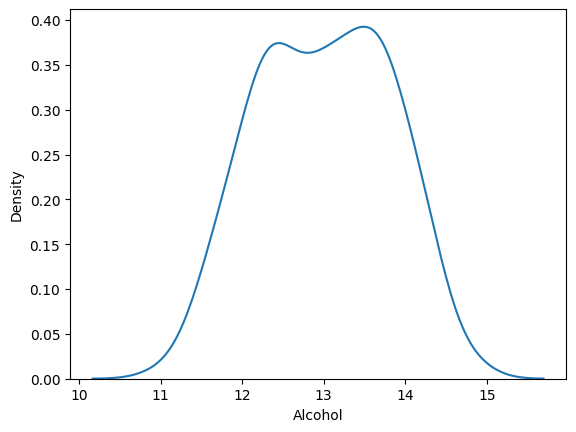

In [ ]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

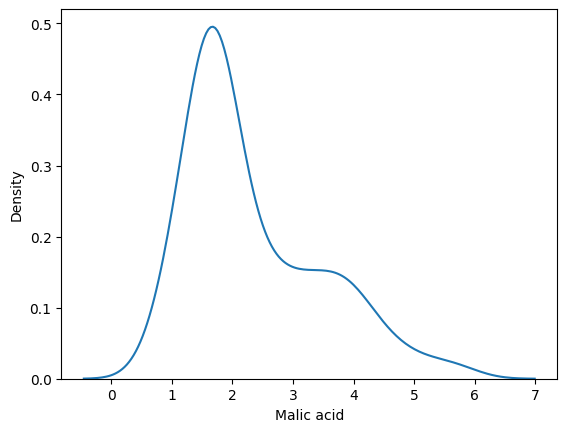

In [ ]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

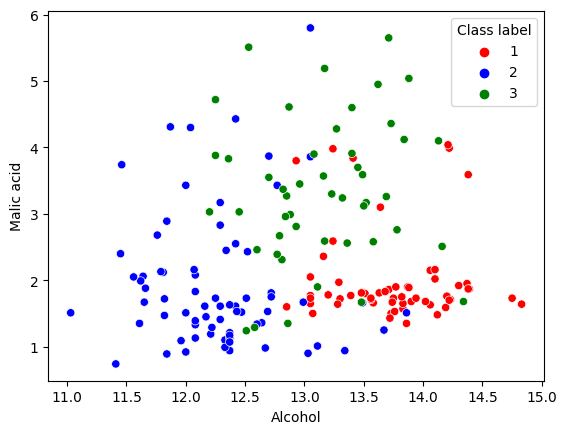

In [ ]:
color_dict = {1: 'red', 3: 'green', 2: 'blue'}
sns.scatterplot(data=df, x='Alcohol', y='Malic acid', hue='Class label', palette=color_dict)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                    df['Class label'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((124, 13), (54, 13))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
np.round(X_train.describe(), 1)

Alcohol  Malic acid    Ash  Alcalinity of Ash  Magnesium  \
count    124.0       124.0  124.0              124.0      124.0   
mean      13.0         2.4    2.4               19.5      100.1   
std        0.8         1.1    0.3                3.6       14.7   
min       11.0         0.9    1.4               10.6       70.0   
25%       12.4         1.6    2.2               17.1       89.0   
50%       13.0         1.9    2.4               19.4       98.0   
75%       13.6         3.2    2.6               21.7      106.2   
max       14.8         5.6    3.2               30.0      162.0   

       Total Phenols  Flavanoids  Nonflavanoid Phenols  Proanthocyanins  \
count          124.0       124.0                 124.0            124.0   
mean             2.3         2.0                   0.4              1.6   
std              0.6         1.0                   0.1              0.6   
min              1.1         0.5                   0.1              0.4   
25%              1.7         1.1                   0.3              1.2   
50%              2.2         2.1                   0.3              1.6   
75%              2.7         2.8                   0.4              2.0   
max              3.9         3.7                   0.7              3.6   

       Color Intensity    Hue  OD280/OD315 of diluted wines  Proline  
count            124.0  124.0                         124.0    124.0  
mean               5.0    1.0                           2.6    746.8  
std                2.4    0.2                           0.7    308.9  
min                1.3    0.5                           1.3    312.0  
25%                3.0    0.8                           1.9    510.0  
50%                4.6    1.0                           2.8    667.5  
75%                6.4    1.1                           3.2    986.2  
max               11.8    1.7                           4.0   1547.0

In [ ]:
np.round(X_train_scaled.describe(), 1)

Alcohol  Malic acid    Ash  Alcalinity of Ash  Magnesium  \
count    124.0       124.0  124.0              124.0      124.0   
mean       0.5         0.3    0.5                0.5        0.3   
std        0.2         0.2    0.1                0.2        0.2   
min        0.0         0.0    0.0                0.0        0.0   
25%        0.4         0.2    0.5                0.3        0.2   
50%        0.5         0.2    0.5                0.5        0.3   
75%        0.7         0.5    0.6                0.6        0.4   
max        1.0         1.0    1.0                1.0        1.0   

       Total Phenols  Flavanoids  Nonflavanoid Phenols  Proanthocyanins  \
count          124.0       124.0                 124.0            124.0   
mean             0.4         0.5                   0.4              0.4   
std              0.2         0.3                   0.2              0.2   
min              0.0         0.0                   0.0              0.0   
25%              0.2         0.2                   0.3              0.3   
50%              0.4         0.5                   0.4              0.4   
75%              0.6         0.7                   0.6              0.5   
max              1.0         1.0                   1.0              1.0   

       Color Intensity    Hue  OD280/OD315 of diluted wines  Proline  
count            124.0  124.0                         124.0    124.0  
mean               0.4    0.4                           0.5      0.4  
std                0.2    0.2                           0.3      0.3  
min                0.0    0.0                           0.0      0.0  
25%                0.2    0.2                           0.2      0.2  
50%                0.3    0.4                           0.6      0.3  
75%                0.5    0.5                           0.7      0.5  
max                1.0    1.0                           1.0      1.0

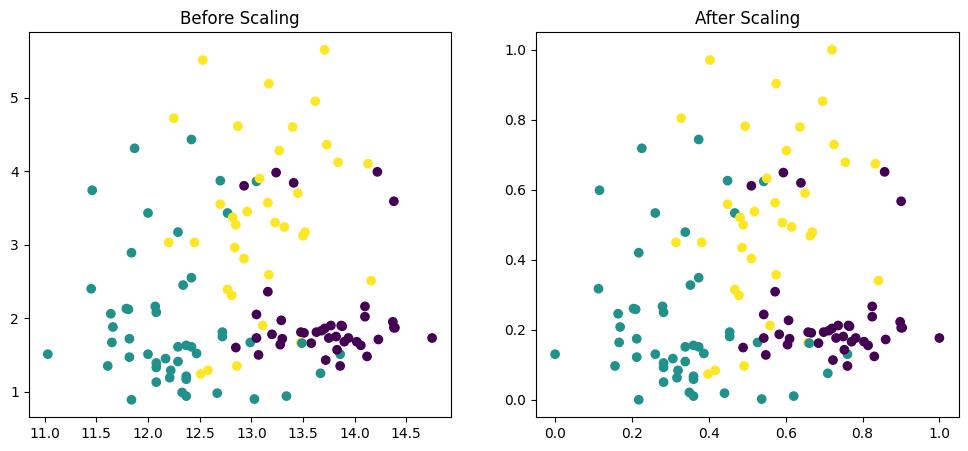

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

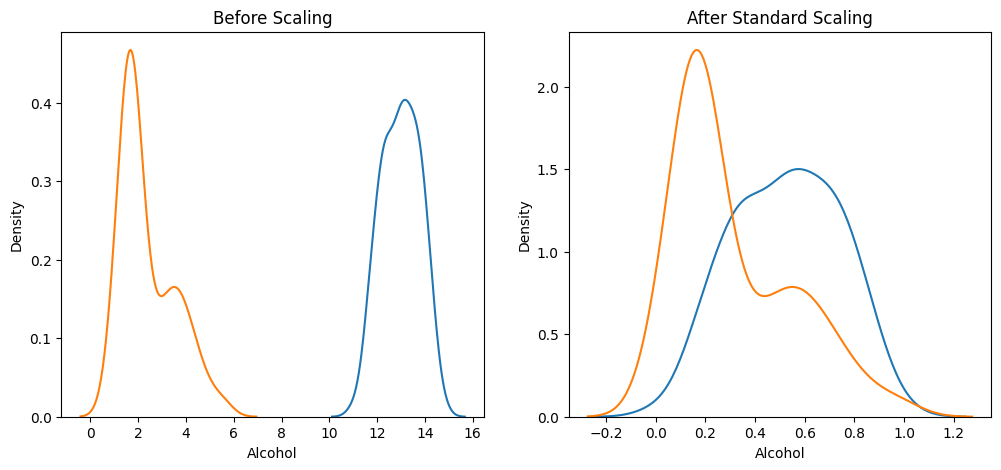

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

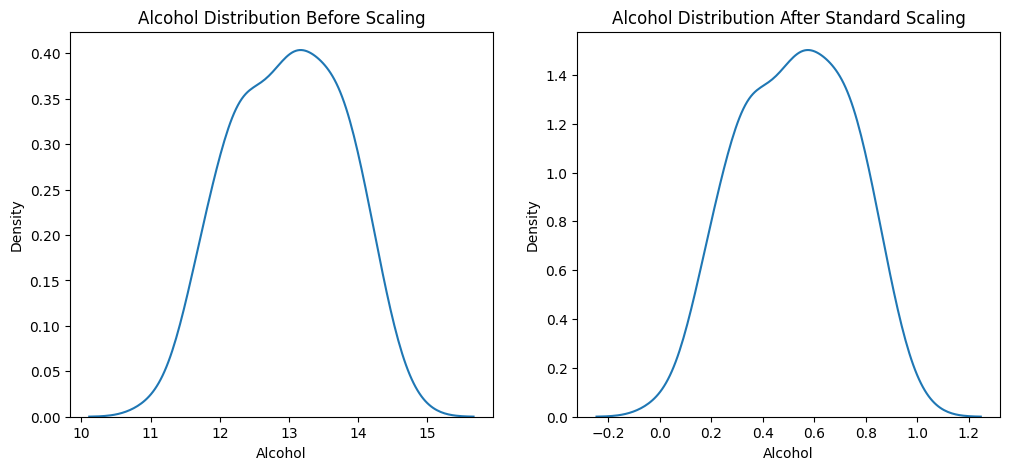

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

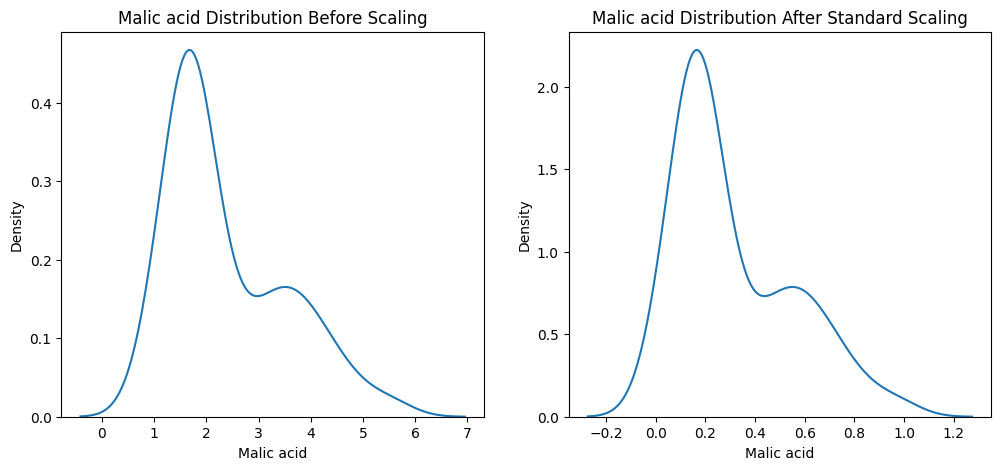

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

***Z-Score Standardization (Standard Scaling):***

* Formula: X_standardized = (X - μ) / σ
Explanation:
* X_standardized: Represents the new standardized value of the original data point
* X: Denotes the original data point you want to standardize.
* μ (mu): Stands for the mean (average) of the data.
* σ (sigma): Represents the standard deviation of the data.

Purpose: Z-Score Standardization transforms data to have a mean of 0 and a standard deviation of 1, making it suitable for statistical analyses and machine learning algorithms that assume a normal distribution

<Axes: xlabel='Ash', ylabel='Density'>

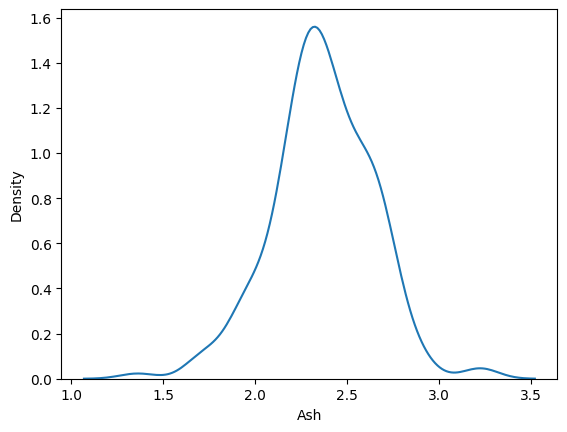

In [ ]:
sns.kdeplot(df['Ash'])

<Axes: xlabel='Alcalinity of Ash', ylabel='Density'>

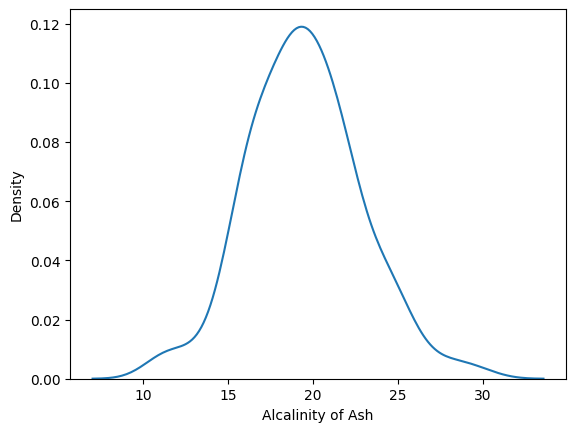

In [ ]:
sns.kdeplot(df['Alcalinity of Ash'])

<Axes: xlabel='Ash', ylabel='Alcalinity of Ash'>

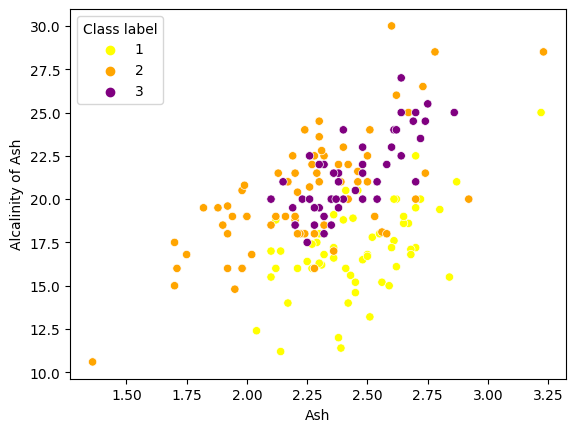

In [ ]:
color_dict = {1: 'Yellow', 3: 'Purple', 2: 'Orange'}
sns.scatterplot(data=df, x='Ash', y='Alcalinity of Ash', hue='Class label', palette=color_dict)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                    df['Class label'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((124, 13), (54, 13))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler to the train set, it will learn the mean and standard deviation
scaler.fit(X_train)

# Transform train and test sets
X_train_standardized = scaler.transform(X_train)
X_test_standardized = scaler.transform(X_test)


In [ ]:
X_train_standardized = pd.DataFrame(X_train_standardized, columns=X_train.columns)
X_test_standardized = pd.DataFrame(X_test_standardized, columns=X_test.columns)

In [ ]:
np.round(X_train.describe(), 1)

Alcohol  Malic acid    Ash  Alcalinity of Ash  Magnesium  \
count    124.0       124.0  124.0              124.0      124.0   
mean      13.0         2.4    2.4               19.5      100.1   
std        0.8         1.1    0.3                3.6       14.7   
min       11.0         0.9    1.4               10.6       70.0   
25%       12.4         1.6    2.2               17.1       89.0   
50%       13.0         1.9    2.4               19.4       98.0   
75%       13.6         3.2    2.6               21.7      106.2   
max       14.8         5.6    3.2               30.0      162.0   

       Total Phenols  Flavanoids  Nonflavanoid Phenols  Proanthocyanins  \
count          124.0       124.0                 124.0            124.0   
mean             2.3         2.0                   0.4              1.6   
std              0.6         1.0                   0.1              0.6   
min              1.1         0.5                   0.1              0.4   
25%              1.7         1.1                   0.3              1.2   
50%              2.2         2.1                   0.3              1.6   
75%              2.7         2.8                   0.4              2.0   
max              3.9         3.7                   0.7              3.6   

       Color Intensity    Hue  OD280/OD315 of diluted wines  Proline  
count            124.0  124.0                         124.0    124.0  
mean               5.0    1.0                           2.6    746.8  
std                2.4    0.2                           0.7    308.9  
min                1.3    0.5                           1.3    312.0  
25%                3.0    0.8                           1.9    510.0  
50%                4.6    1.0                           2.8    667.5  
75%                6.4    1.1                           3.2    986.2  
max               11.8    1.7                           4.0   1547.0

In [ ]:
np.round(X_train_standardized.describe(), 1)

Alcohol  Malic acid    Ash  Alcalinity of Ash  Magnesium  \
count    124.0       124.0  124.0              124.0      124.0   
mean      -0.0        -0.0   -0.0               -0.0       -0.0   
std        1.0         1.0    1.0                1.0        1.0   
min       -2.4        -1.3   -3.6               -2.5       -2.1   
25%       -0.8        -0.7   -0.5               -0.7       -0.8   
50%        0.1        -0.4   -0.0               -0.0       -0.1   
75%        0.8         0.8    0.7                0.6        0.4   
max        2.2         2.9    3.1                2.9        4.2   

       Total Phenols  Flavanoids  Nonflavanoid Phenols  Proanthocyanins  \
count          124.0       124.0                 124.0            124.0   
mean            -0.0         0.0                  -0.0             -0.0   
std              1.0         1.0                   1.0              1.0   
min             -1.9        -1.5                  -1.8             -2.0   
25%             -0.9        -0.9                  -0.8             -0.6   
50%             -0.1         0.1                  -0.2             -0.1   
75%              0.7         0.8                   0.7              0.6   
max              2.7         1.8                   2.4              3.3   

       Color Intensity    Hue  OD280/OD315 of diluted wines  Proline  
count            124.0  124.0                         124.0    124.0  
mean               0.0   -0.0                          -0.0      0.0  
std                1.0    1.0                           1.0      1.0  
min               -1.6   -1.8                          -1.9     -1.4  
25%               -0.8   -0.7                          -1.0     -0.8  
50%               -0.2    0.0                           0.2     -0.3  
75%                0.6    0.7                           0.8      0.8  
max                2.9    3.2                           1.9      2.6

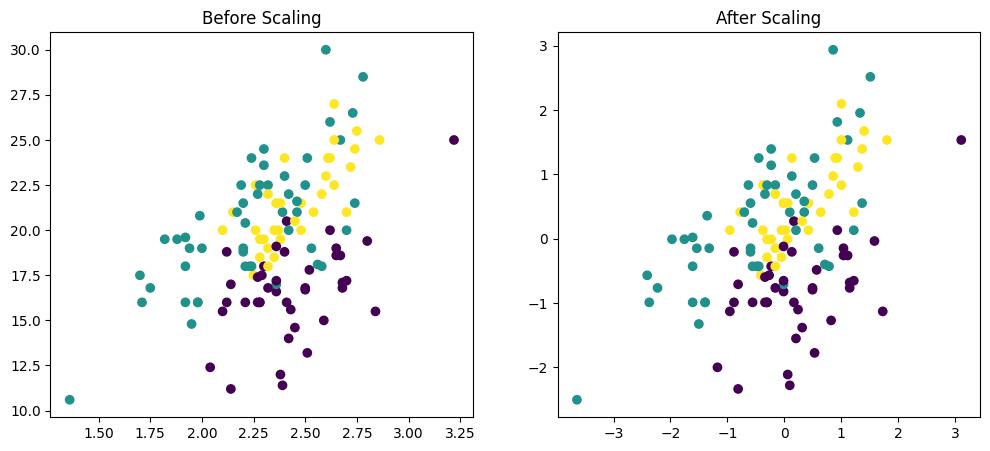

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Ash'], X_train['Alcalinity of Ash'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_standardized['Ash'], X_train_standardized['Alcalinity of Ash'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

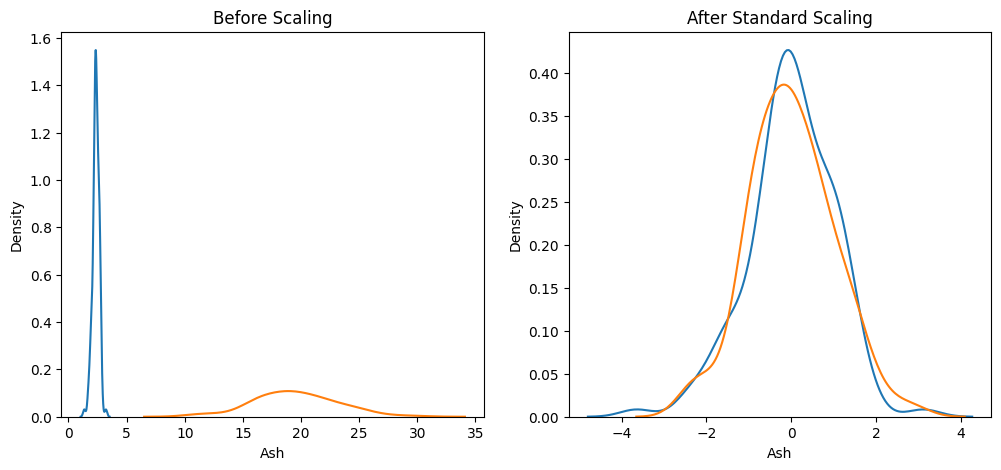

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Ash'], ax=ax1)
sns.kdeplot(X_train['Alcalinity of Ash'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_standardized['Ash'], ax=ax2)
sns.kdeplot(X_train_standardized['Alcalinity of Ash'], ax=ax2)
plt.show()

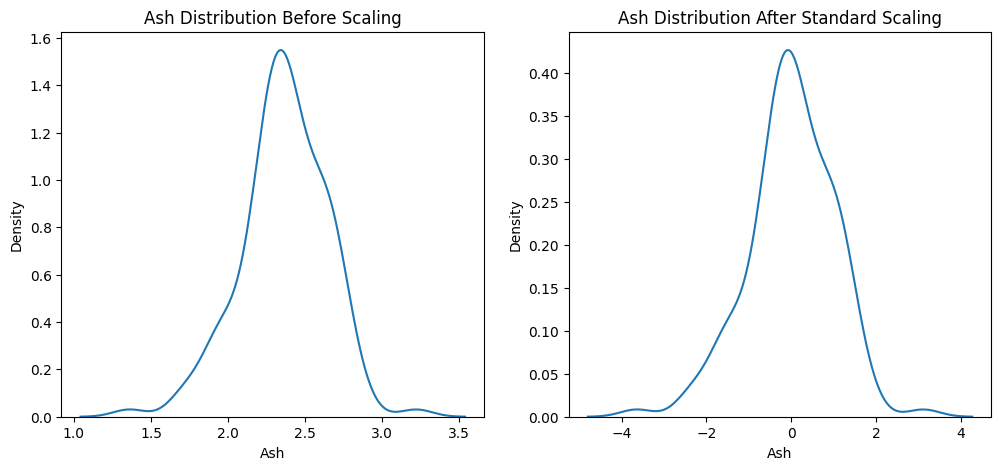

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Ash Distribution Before Scaling')
sns.kdeplot(X_train['Ash'], ax=ax1)

# after scaling
ax2.set_title('Ash Distribution After Standard Scaling')
sns.kdeplot(X_train_standardized['Ash'], ax=ax2)
plt.show()

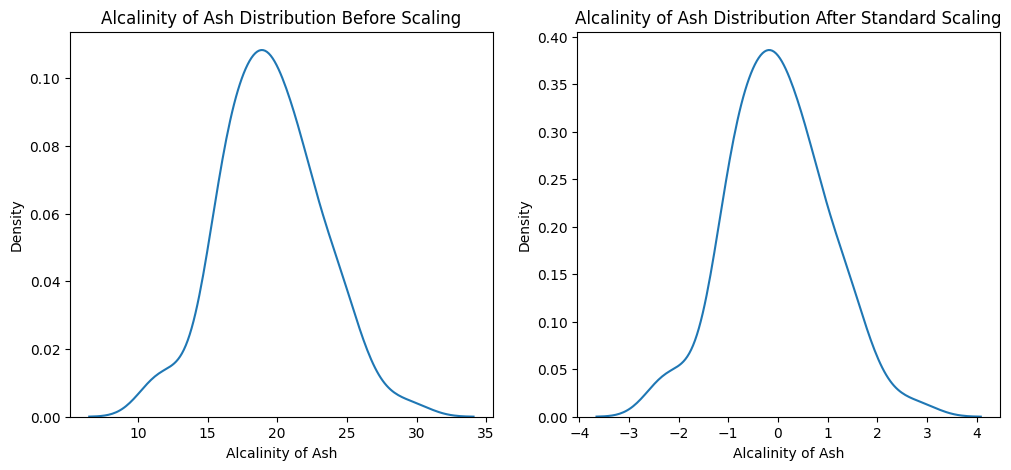

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcalinity of Ash Distribution Before Scaling')
sns.kdeplot(X_train['Alcalinity of Ash'], ax=ax1)

# after scaling
ax2.set_title('Alcalinity of Ash Distribution After Standard Scaling')
sns.kdeplot(X_train_standardized['Alcalinity of Ash'], ax=ax2)
plt.show()

 **Robust Scaling (Scaling to Median and IQR):**

 *Formula*: `X_scaled = (X - median) / IQR`
   - *Explanation*:
     - `X_scaled`: Represents the new scaled value of the original data point `X`.
     - `X`: Signifies the original data point you want to scale.
     - `median`: Refers to the median value of the column or dataset.
     - `IQR`: Stands for the Interquartile Range, a measure of the data's spread.
   - *Purpose*: Robust Scaling is used to scale data based on the median and IQR, making it robust to outliers. It's suitable for data with non-normal distributions and extreme values.


<Axes: xlabel='Magnesium', ylabel='Density'>

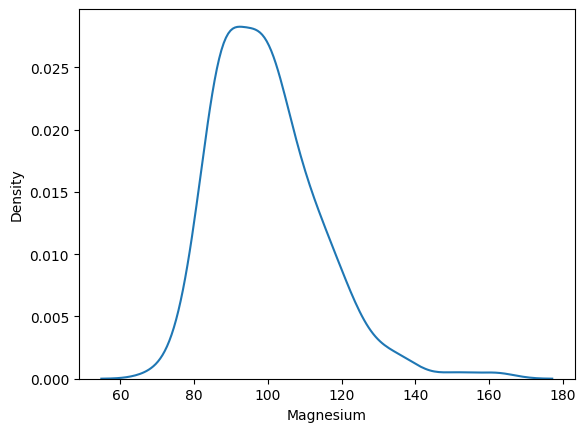

In [ ]:
sns.kdeplot(df['Magnesium'])

<Axes: xlabel='Total Phenols', ylabel='Density'>

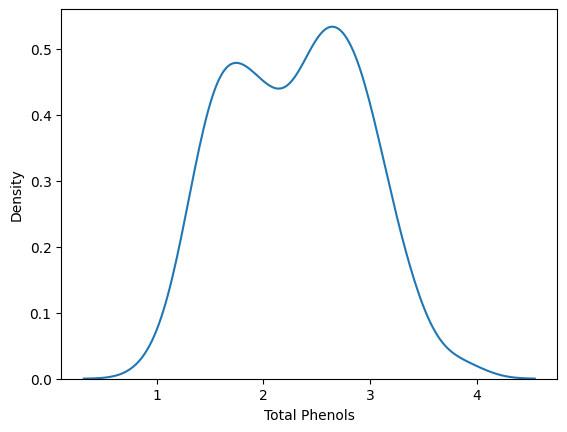

In [ ]:
sns.kdeplot(df['Total Phenols'])

<Axes: xlabel='Magnesium', ylabel='Total Phenols'>

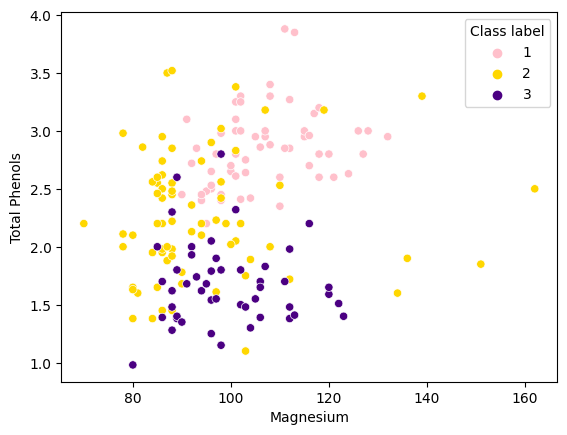

In [ ]:
color_dict={1:'Pink',3:'Indigo',2:'Gold'}
sns.scatterplot(data=df, x='Magnesium',y='Total Phenols',hue=df['Class label'],palette=color_dict)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                    df['Class label'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((124, 13), (54, 13))

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

# Fit the scaler to the train set, it will learn the median and IQR
scaler.fit(X_train)

# Transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
np.round(X_train.describe(), 1)

Alcohol  Malic acid    Ash  Alcalinity of Ash  Magnesium  \
count    124.0       124.0  124.0              124.0      124.0   
mean      13.0         2.4    2.4               19.5      100.1   
std        0.8         1.1    0.3                3.6       14.7   
min       11.0         0.9    1.4               10.6       70.0   
25%       12.4         1.6    2.2               17.1       89.0   
50%       13.0         1.9    2.4               19.4       98.0   
75%       13.6         3.2    2.6               21.7      106.2   
max       14.8         5.6    3.2               30.0      162.0   

       Total Phenols  Flavanoids  Nonflavanoid Phenols  Proanthocyanins  \
count          124.0       124.0                 124.0            124.0   
mean             2.3         2.0                   0.4              1.6   
std              0.6         1.0                   0.1              0.6   
min              1.1         0.5                   0.1              0.4   
25%              1.7         1.1                   0.3              1.2   
50%              2.2         2.1                   0.3              1.6   
75%              2.7         2.8                   0.4              2.0   
max              3.9         3.7                   0.7              3.6   

       Color Intensity    Hue  OD280/OD315 of diluted wines  Proline  
count            124.0  124.0                         124.0    124.0  
mean               5.0    1.0                           2.6    746.8  
std                2.4    0.2                           0.7    308.9  
min                1.3    0.5                           1.3    312.0  
25%                3.0    0.8                           1.9    510.0  
50%                4.6    1.0                           2.8    667.5  
75%                6.4    1.1                           3.2    986.2  
max               11.8    1.7                           4.0   1547.0

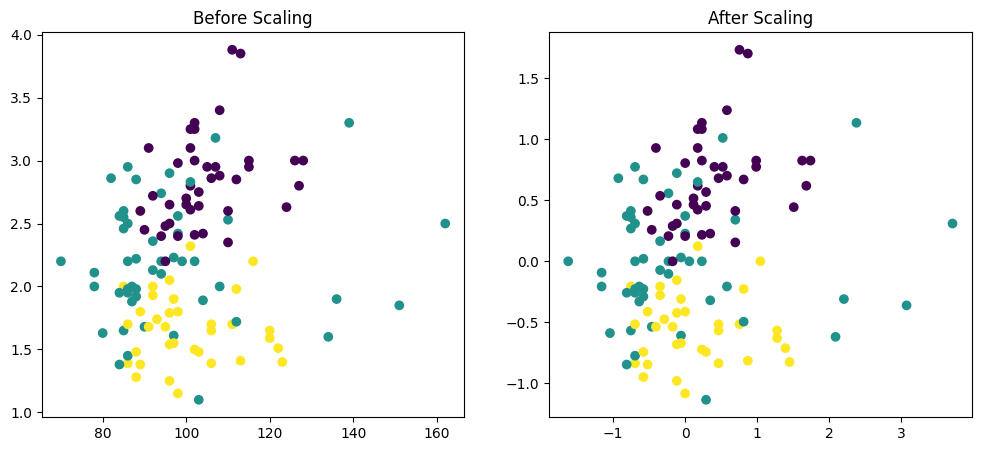

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Magnesium'], X_train['Total Phenols'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Magnesium'], X_train_scaled['Total Phenols'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

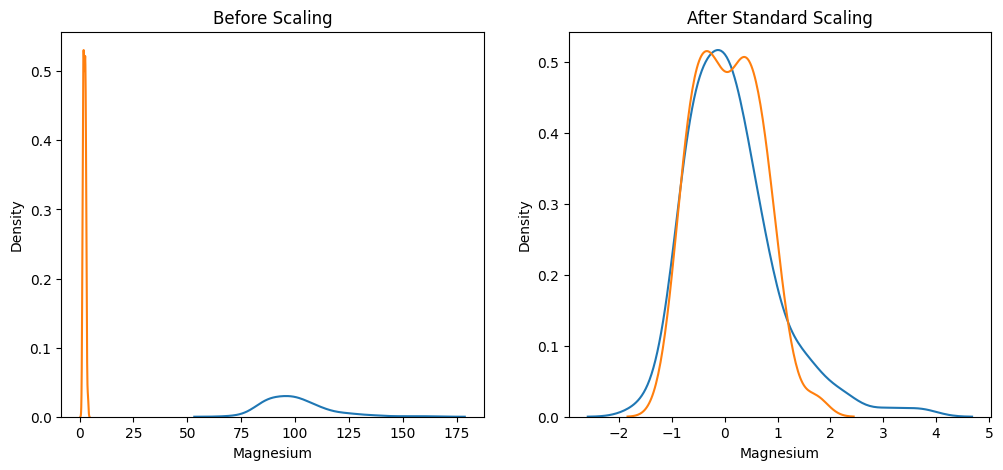

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Magnesium'], ax=ax1)
sns.kdeplot(X_train['Total Phenols'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Magnesium'], ax=ax2)
sns.kdeplot(X_train_scaled['Total Phenols'], ax=ax2)
plt.show()

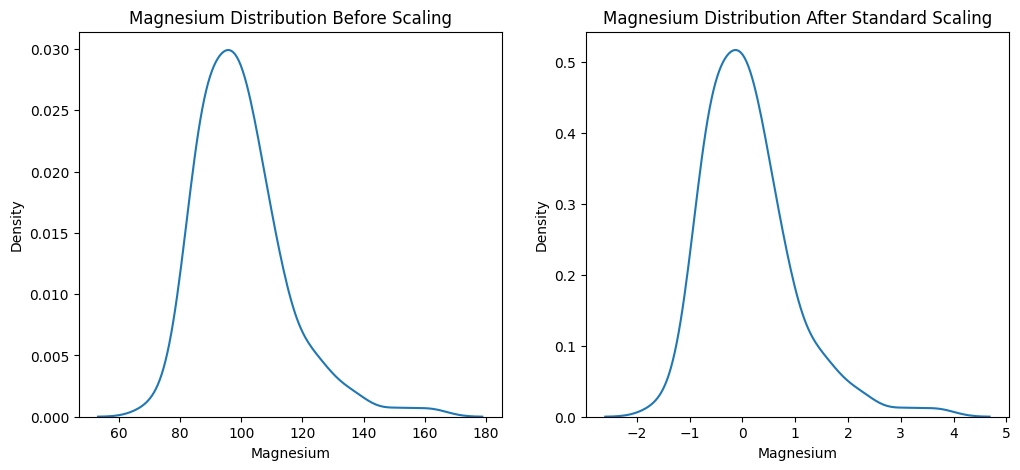

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Magnesium Distribution Before Scaling')
sns.kdeplot(X_train['Magnesium'], ax=ax1)

# after scaling
ax2.set_title('Magnesium Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Magnesium'], ax=ax2)
plt.show()

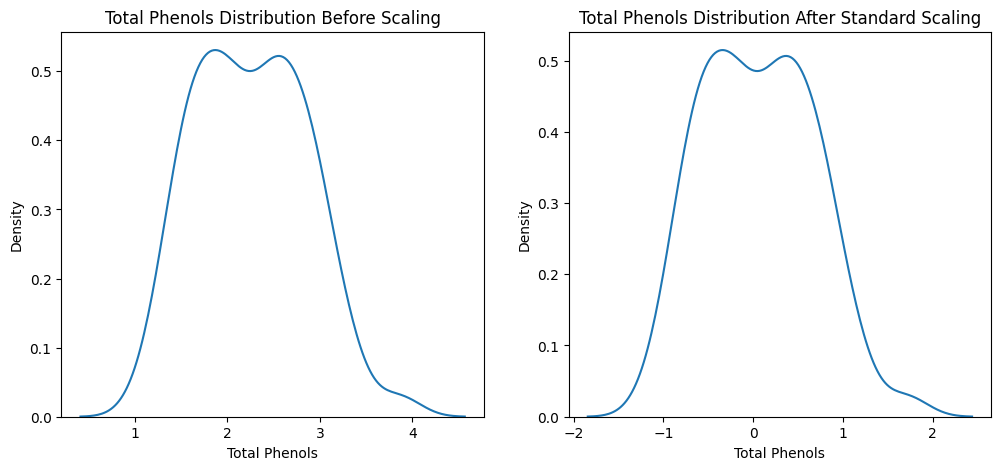

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Total Phenols Distribution Before Scaling')
sns.kdeplot(X_train['Total Phenols'], ax=ax1)

# after scaling
ax2.set_title('Total Phenols Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Total Phenols'], ax=ax2)
plt.show()

 ***Log Transformation***

   - *Formula*: `X_transformed = log(X)`
   - *Explanation*:
     - `X_transformed`: Represents the new transformed value of the original data point `X`.
     - `X`: Denotes the original data point you want to transform.
   - *Purpose*: Log Transformation applies a logarithm to each data point, reducing the impact of skewed distributions and making the data more symmetric, particularly useful in cases where data is highly skewed.

<Axes: xlabel='Flavanoids', ylabel='Density'>

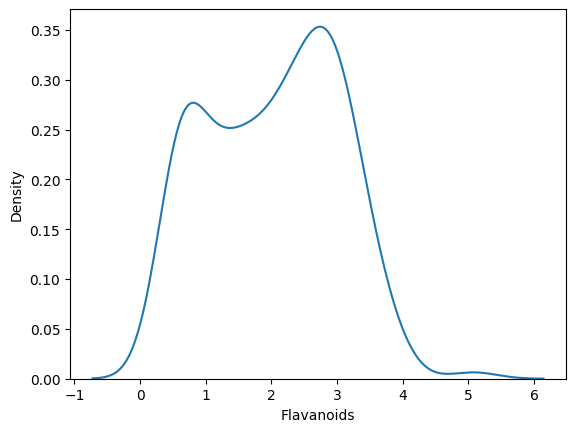

In [ ]:
sns.kdeplot(df['Flavanoids'])

<Axes: xlabel='Nonflavanoid Phenols', ylabel='Density'>

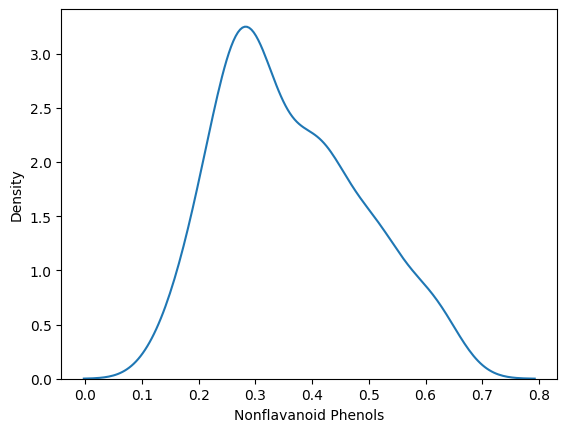

In [ ]:
sns.kdeplot(df['Nonflavanoid Phenols'])

<Axes: xlabel='Flavanoids', ylabel='Nonflavanoid Phenols'>

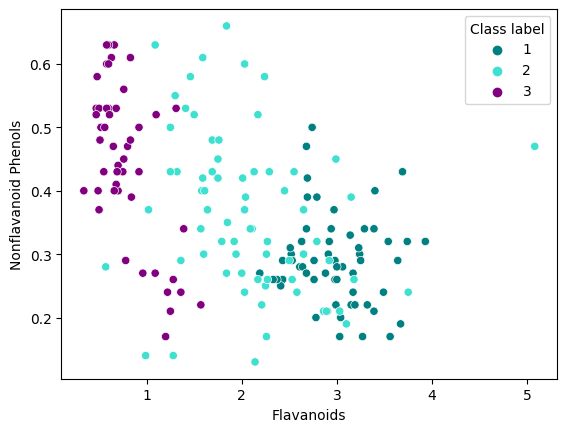

In [ ]:
color_dict={1:'Teal',3:'Purple',2:'Turquoise'}
sns.scatterplot(data=df, x='Flavanoids', y='Nonflavanoid Phenols',hue=df['Class label'],palette=color_dict)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                    df['Class label'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((124, 13), (54, 13))

In [ ]:
# Initialize DataFrames to store transformed data
X_train_log_transformed = pd.DataFrame()
X_test_log_transformed = pd.DataFrame()

# Apply log transformation to each column in X_train
for column in X_train.columns:
    transformed_data = np.log(X_train['Flavanoids'])  # Use quotes around column name
    X_train_log_transformed['Flavanoids'] = transformed_data  # Use quotes around column name

# Apply log transformation to each column in X_test
for column in X_test.columns:
    transformed_data = np.log(X_test['Nonflavanoid Phenols'])  # Use quotes around column name
    X_test_log_transformed['Nonflavanoid Phenols'] = transformed_data  # Use quotes around column name


In [ ]:
X_train_log_transformed = pd.DataFrame(X_train_log_transformed, columns=X_train.columns)
X_test_log_transformed = pd.DataFrame(X_test_log_transformed, columns=X_test.columns)

In [ ]:
np.round(X_train.describe(), 1)

Alcohol  Malic acid    Ash  Alcalinity of Ash  Magnesium  \
count    124.0       124.0  124.0              124.0      124.0   
mean      13.0         2.4    2.4               19.5      100.1   
std        0.8         1.1    0.3                3.6       14.7   
min       11.0         0.9    1.4               10.6       70.0   
25%       12.4         1.6    2.2               17.1       89.0   
50%       13.0         1.9    2.4               19.4       98.0   
75%       13.6         3.2    2.6               21.7      106.2   
max       14.8         5.6    3.2               30.0      162.0   

       Total Phenols  Flavanoids  Nonflavanoid Phenols  Proanthocyanins  \
count          124.0       124.0                 124.0            124.0   
mean             2.3         2.0                   0.4              1.6   
std              0.6         1.0                   0.1              0.6   
min              1.1         0.5                   0.1              0.4   
25%              1.7         1.1                   0.3              1.2   
50%              2.2         2.1                   0.3              1.6   
75%              2.7         2.8                   0.4              2.0   
max              3.9         3.7                   0.7              3.6   

       Color Intensity    Hue  OD280/OD315 of diluted wines  Proline  
count            124.0  124.0                         124.0    124.0  
mean               5.0    1.0                           2.6    746.8  
std                2.4    0.2                           0.7    308.9  
min                1.3    0.5                           1.3    312.0  
25%                3.0    0.8                           1.9    510.0  
50%                4.6    1.0                           2.8    667.5  
75%                6.4    1.1                           3.2    986.2  
max               11.8    1.7                           4.0   1547.0

In [ ]:
np.round(X_train_log_transformed.describe(), 1)

Alcohol  Malic acid  Ash  Alcalinity of Ash  Magnesium  Total Phenols  \
count      0.0         0.0  0.0                0.0        0.0            0.0   
mean       NaN         NaN  NaN                NaN        NaN            NaN   
std        NaN         NaN  NaN                NaN        NaN            NaN   
min        NaN         NaN  NaN                NaN        NaN            NaN   
25%        NaN         NaN  NaN                NaN        NaN            NaN   
50%        NaN         NaN  NaN                NaN        NaN            NaN   
75%        NaN         NaN  NaN                NaN        NaN            NaN   
max        NaN         NaN  NaN                NaN        NaN            NaN   

       Flavanoids  Nonflavanoid Phenols  Proanthocyanins  Color Intensity  \
count       124.0                   0.0              0.0              0.0   
mean          0.5                   NaN              NaN              NaN   
std           0.6                   NaN              NaN              NaN   
min          -0.8                   NaN              NaN              NaN   
25%           0.1                   NaN              NaN              NaN   
50%           0.7                   NaN              NaN              NaN   
75%           1.0                   NaN              NaN              NaN   
max           1.3                   NaN              NaN              NaN   

       Hue  OD280/OD315 of diluted wines  Proline  
count  0.0                           0.0      0.0  
mean   NaN                           NaN      NaN  
std    NaN                           NaN      NaN  
min    NaN                           NaN      NaN  
25%    NaN                           NaN      NaN  
50%    NaN                           NaN      NaN  
75%    NaN                           NaN      NaN  
max    NaN                           NaN      NaN

<ipython-input-86-a0cdf637e21e>:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(X_train_log_transformed['Nonflavanoid Phenols'], ax=ax2)


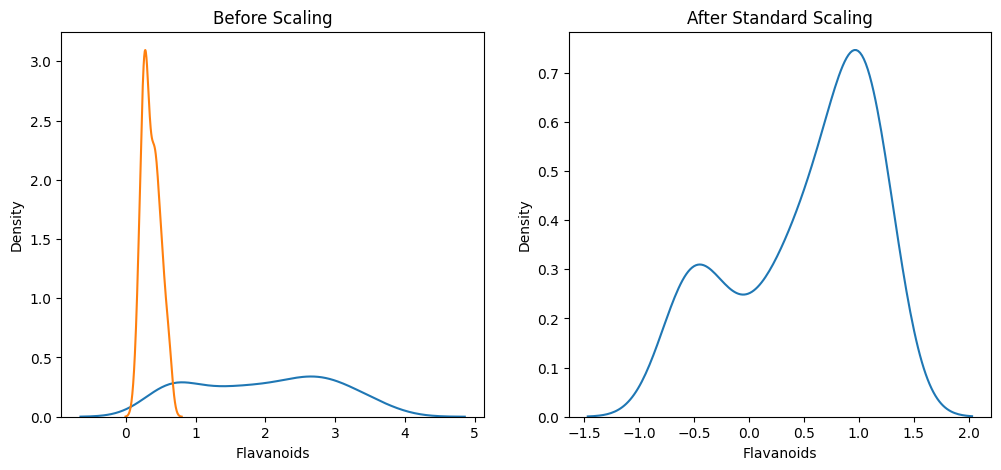

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Flavanoids'], ax=ax1)
sns.kdeplot(X_train['Nonflavanoid Phenols'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_log_transformed['Flavanoids'], ax=ax2)
sns.kdeplot(X_train_log_transformed['Nonflavanoid Phenols'], ax=ax2)
plt.show()

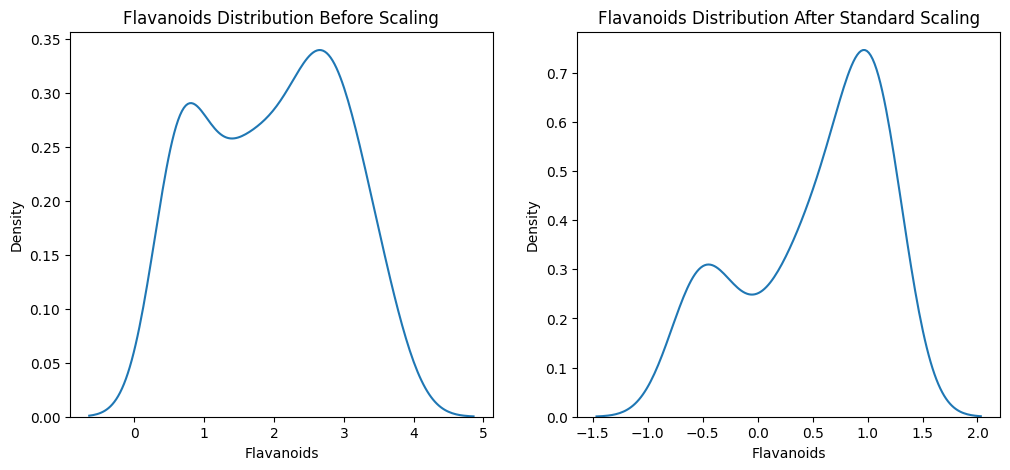

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Flavanoids Distribution Before Scaling')
sns.kdeplot(X_train['Flavanoids'], ax=ax1)

# after scaling
ax2.set_title('Flavanoids Distribution After Standard Scaling')
sns.kdeplot(X_train_log_transformed['Flavanoids'], ax=ax2)
plt.show()

<ipython-input-88-f461d5923cbe>:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(X_train_log_transformed['Nonflavanoid Phenols'], ax=ax2)


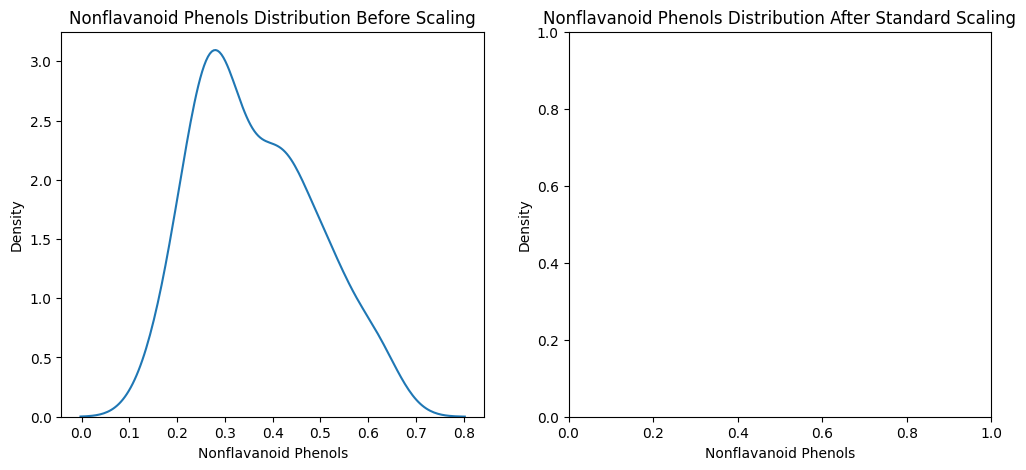

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Nonflavanoid Phenols Distribution Before Scaling')
sns.kdeplot(X_train['Nonflavanoid Phenols'], ax=ax1)

# after scaling
ax2.set_title('Nonflavanoid Phenols Distribution After Standard Scaling')
sns.kdeplot(X_train_log_transformed['Nonflavanoid Phenols'], ax=ax2)
plt.show()

**Box-Cox Transformation**

   - *Formula*: `X_transformed = (X^λ - 1) / λ`
   - *Explanation*:
     - `X_transformed`: Represents the new transformed value after applying the Box-Cox transformation to the original data point `X`.
     - `X`: Signifies the original data point to be transformed.
     - `λ (lambda)`: A parameter chosen to optimize the transformation.
   - *Purpose*: The Box-Cox Transformation is a family of power transformations that stabilize variance and aim to make data more closely resemble a normal distribution. The choice of λ is critical for achieving the transformation's goal.

<Axes: xlabel='Proanthocyanins', ylabel='Density'>

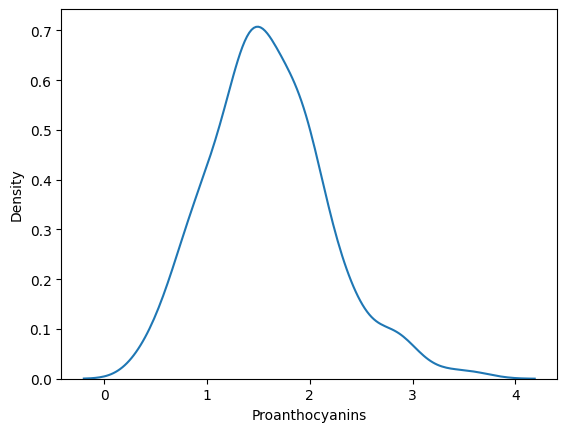

In [ ]:
sns.kdeplot(df['Proanthocyanins'])

<Axes: xlabel='Color Intensity', ylabel='Density'>

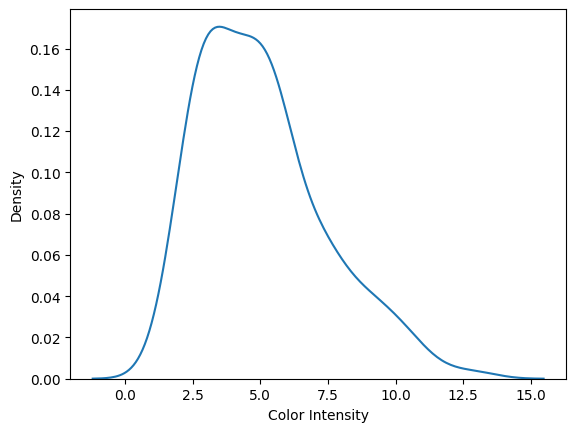

In [ ]:
sns.kdeplot(df['Color Intensity'])

<Axes: xlabel='Proanthocyanins', ylabel='Color Intensity'>

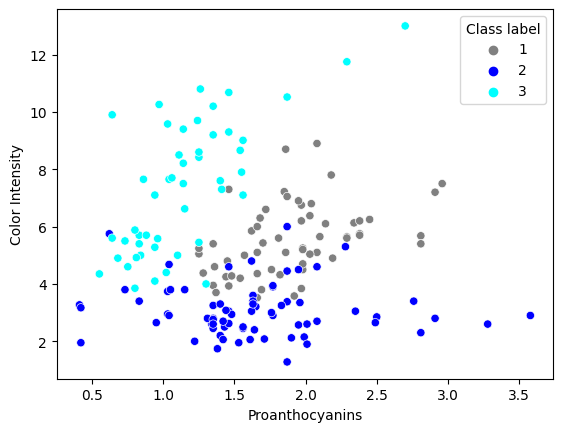

In [ ]:
color_dict={1:'Gray',3:'Cyan',2:'blue'}
sns.scatterplot(data=df, x='Proanthocyanins' , y='Color Intensity',hue=df['Class label'],palette=color_dict)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                    df['Class label'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((124, 13), (54, 13))

In [ ]:
from scipy.stats import boxcox

# Initialize DataFrames to store transformed data
X_train_box_cox = pd.DataFrame()
X_test_box_cox = pd.DataFrame()

# Apply Box-Cox transformation to each column in X_train
for column in X_train.columns:
    transformed_data, _ = boxcox(X_train[column])
    X_train_box_cox[column] = transformed_data

# Apply Box-Cox transformation to each column in X_test
for column in X_test.columns:
    transformed_data, _ = boxcox(X_test[column])
    X_test_box_cox[column] = transformed_data


In [ ]:
X_train_box_cox = pd.DataFrame(X_train_box_cox, columns=X_train.columns)
X_test_box_cox = pd.DataFrame(X_test_box_cox, columns=X_test.columns)

In [ ]:
np.round(X_train.describe(), 1)

Alcohol  Malic acid    Ash  Alcalinity of Ash  Magnesium  \
count    124.0       124.0  124.0              124.0      124.0   
mean      13.0         2.4    2.4               19.5      100.1   
std        0.8         1.1    0.3                3.6       14.7   
min       11.0         0.9    1.4               10.6       70.0   
25%       12.4         1.6    2.2               17.1       89.0   
50%       13.0         1.9    2.4               19.4       98.0   
75%       13.6         3.2    2.6               21.7      106.2   
max       14.8         5.6    3.2               30.0      162.0   

       Total Phenols  Flavanoids  Nonflavanoid Phenols  Proanthocyanins  \
count          124.0       124.0                 124.0            124.0   
mean             2.3         2.0                   0.4              1.6   
std              0.6         1.0                   0.1              0.6   
min              1.1         0.5                   0.1              0.4   
25%              1.7         1.1                   0.3              1.2   
50%              2.2         2.1                   0.3              1.6   
75%              2.7         2.8                   0.4              2.0   
max              3.9         3.7                   0.7              3.6   

       Color Intensity    Hue  OD280/OD315 of diluted wines  Proline  
count            124.0  124.0                         124.0    124.0  
mean               5.0    1.0                           2.6    746.8  
std                2.4    0.2                           0.7    308.9  
min                1.3    0.5                           1.3    312.0  
25%                3.0    0.8                           1.9    510.0  
50%                4.6    1.0                           2.8    667.5  
75%                6.4    1.1                           3.2    986.2  
max               11.8    1.7                           4.0   1547.0

In [ ]:
np.round(X_train_box_cox.describe(), 1)

Alcohol  Malic acid    Ash  Alcalinity of Ash  Magnesium  \
count    124.0       124.0  124.0              124.0      124.0   
mean      31.9         0.7    2.2               12.3        0.6   
std        3.1         0.4    0.6                2.0        0.0   
min       24.7        -0.1    0.4                7.1        0.6   
25%       29.5         0.4    1.9               11.0        0.6   
50%       32.1         0.6    2.2               12.3        0.6   
75%       34.4         1.0    2.7               13.6        0.6   
max       38.8         1.3    4.4               18.0        0.6   

       Total Phenols  Flavanoids  Nonflavanoid Phenols  Proanthocyanins  \
count          124.0       124.0                 124.0            124.0   
mean             1.0         0.8                  -0.9              0.5   
std              0.4         0.8                   0.3              0.5   
min              0.1        -0.6                  -1.5             -0.7   
25%              0.6         0.1                  -1.1              0.2   
50%              1.0         1.0                  -0.9              0.5   
75%              1.3         1.5                  -0.7              0.8   
max              1.9         2.2                  -0.4              1.7   

       Color Intensity    Hue  OD280/OD315 of diluted wines  Proline  
count            124.0  124.0                         124.0    124.0  
mean               1.6   -0.1                           1.9      3.8  
std                0.5    0.2                           1.0      0.1  
min                0.2   -0.5                           0.3      3.6  
25%                1.2   -0.2                           1.0      3.8  
50%                1.6   -0.0                           2.1      3.8  
75%                2.0    0.1                           2.7      4.0  
max                2.7    0.7                           3.9      4.1

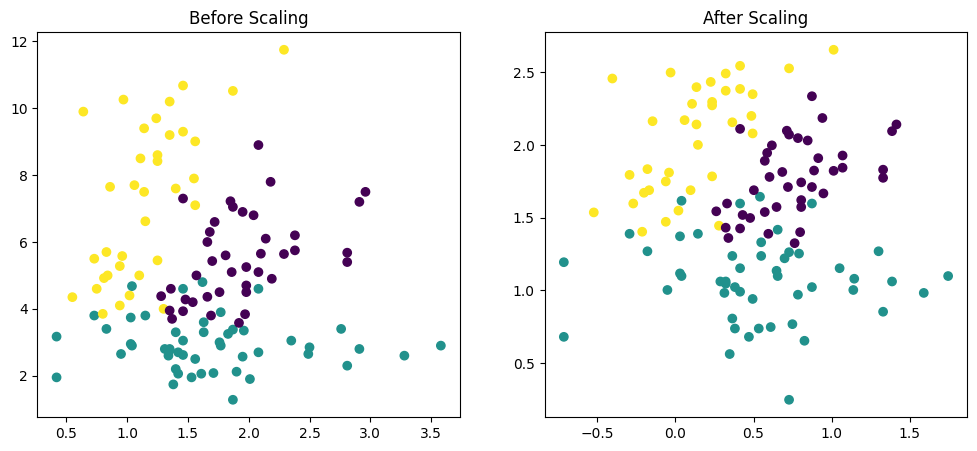

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Proanthocyanins'], X_train['Color Intensity'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_box_cox['Proanthocyanins'], X_train_box_cox['Color Intensity'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

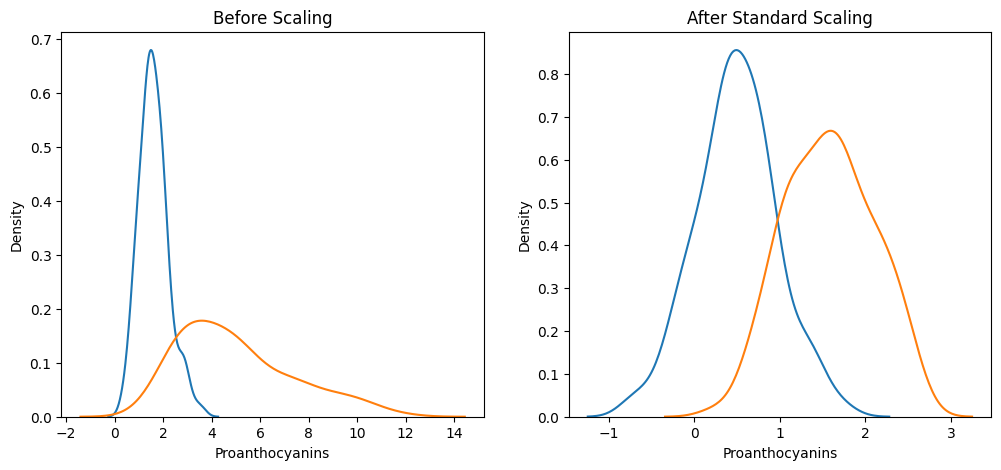

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Proanthocyanins'], ax=ax1)
sns.kdeplot(X_train['Color Intensity'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_box_cox['Proanthocyanins'], ax=ax2)
sns.kdeplot(X_train_box_cox['Color Intensity'], ax=ax2)
plt.show()

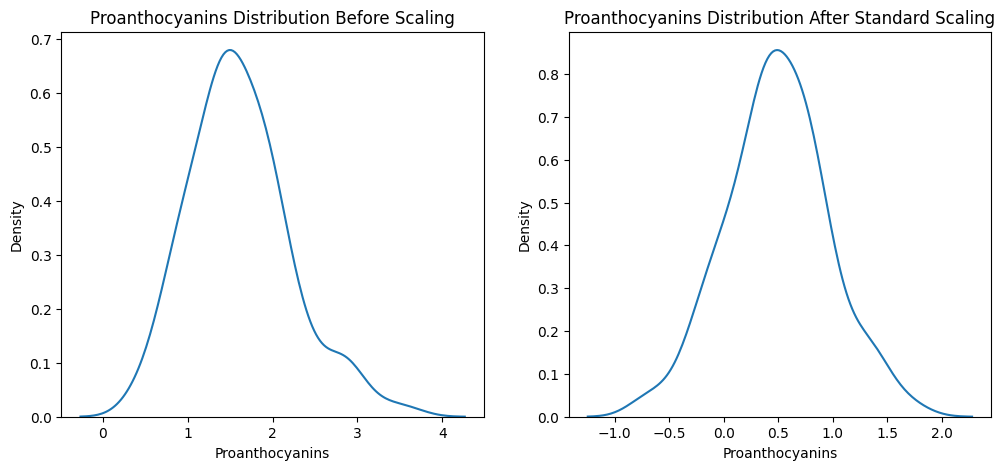

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Proanthocyanins Distribution Before Scaling')
sns.kdeplot(X_train['Proanthocyanins'], ax=ax1)

# after scaling
ax2.set_title('Proanthocyanins Distribution After Standard Scaling')
sns.kdeplot(X_train_box_cox['Proanthocyanins'], ax=ax2)
plt.show()

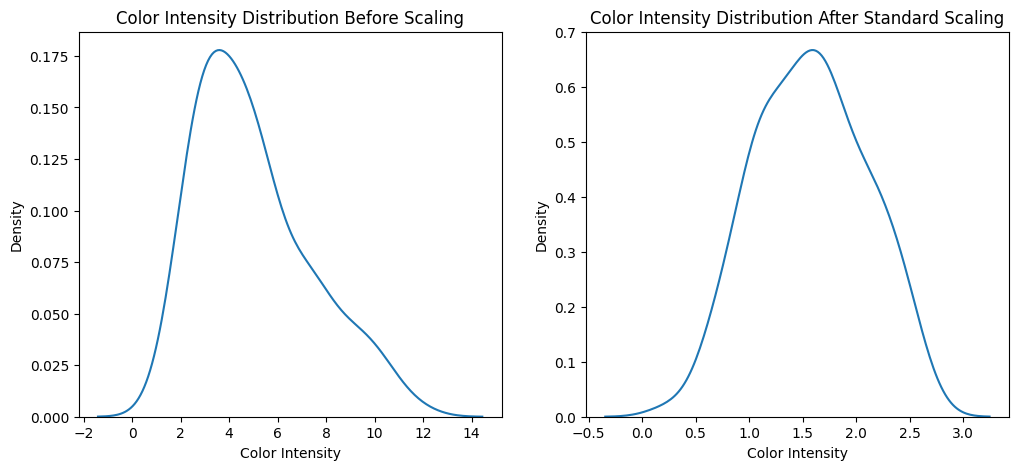

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Color Intensity Distribution Before Scaling')
sns.kdeplot(X_train['Color Intensity'], ax=ax1)

# after scaling
ax2.set_title('Color Intensity Distribution After Standard Scaling')
sns.kdeplot(X_train_box_cox['Color Intensity'], ax=ax2)
plt.show()

 **Unit Vector Transformation (L2 Normalization):**

   - *Formula*: `X_normalized = X / ||X||`
   - *Explanation*:
     - `X_normalized`: Represents the new vector where each element is divided by the magnitude (L2 norm) of the original vector `X`.
     - `X`: Denotes the original vector you want to normalize.
     - `||X||`: Represents the L2 norm of the vector `X`, calculated as the square root of the sum of the squares of its elements.
   - *Purpose*: L2 Normalization scales a vector to have a magnitude of 1. It is commonly used in vector-based analysis, such as calculating cosine similarity, to ensure the direction of vectors remains the same while adjusting their scale.

<Axes: xlabel='Hue', ylabel='Density'>

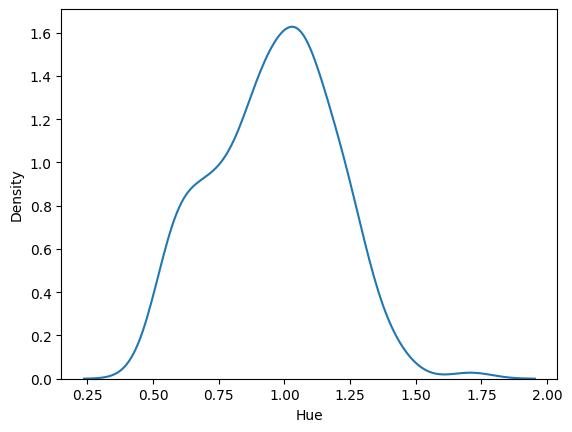

In [ ]:
sns.kdeplot(df['Hue'])

<Axes: xlabel='OD280/OD315 of diluted wines', ylabel='Density'>

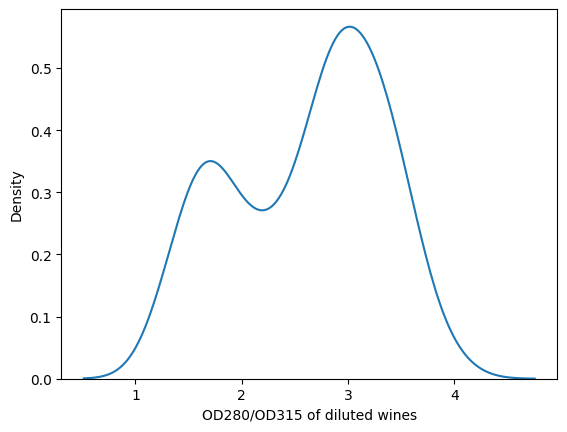

In [ ]:
sns.kdeplot(df['OD280/OD315 of diluted wines'])

<Axes: xlabel='Hue', ylabel='OD280/OD315 of diluted wines'>

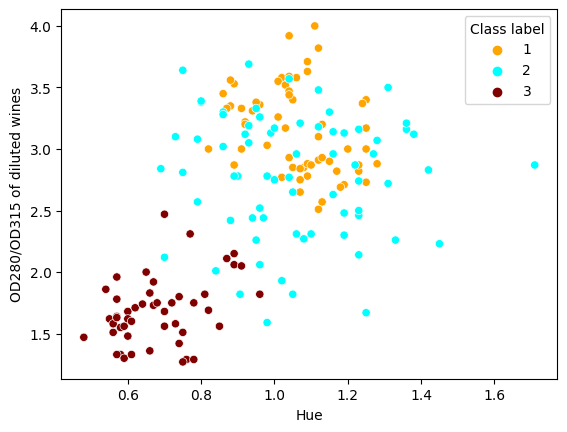

In [ ]:
color_dict={1:'Orange',3:'Maroon',2:'Cyan'}
sns.scatterplot(data=df, x='Hue', y='OD280/OD315 of diluted wines' ,hue=df['Class label'],palette=color_dict)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                    df['Class label'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((124, 13), (54, 13))

In [ ]:
import numpy as np

# Calculate the L2 norm for each data point
l2_norm_train = np.linalg.norm(X_train, axis=1)
l2_norm_test = np.linalg.norm(X_test, axis=1)

# Normalize the data by dividing by the L2 norm
X_train_normalized = X_train / l2_norm_train.reshape(-1, 1)
X_test_normalized = X_test / l2_norm_test.reshape(-1, 1)


In [ ]:
X_train_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)
X_test_normalized = pd.DataFrame(X_test_normalized, columns=X_test.columns)

In [ ]:
np.round(X_train.describe(), 1)

Alcohol  Malic acid    Ash  Alcalinity of Ash  Magnesium  \
count    124.0       124.0  124.0              124.0      124.0   
mean      13.0         2.4    2.4               19.5      100.1   
std        0.8         1.1    0.3                3.6       14.7   
min       11.0         0.9    1.4               10.6       70.0   
25%       12.4         1.6    2.2               17.1       89.0   
50%       13.0         1.9    2.4               19.4       98.0   
75%       13.6         3.2    2.6               21.7      106.2   
max       14.8         5.6    3.2               30.0      162.0   

       Total Phenols  Flavanoids  Nonflavanoid Phenols  Proanthocyanins  \
count          124.0       124.0                 124.0            124.0   
mean             2.3         2.0                   0.4              1.6   
std              0.6         1.0                   0.1              0.6   
min              1.1         0.5                   0.1              0.4   
25%              1.7         1.1                   0.3              1.2   
50%              2.2         2.1                   0.3              1.6   
75%              2.7         2.8                   0.4              2.0   
max              3.9         3.7                   0.7              3.6   

       Color Intensity    Hue  OD280/OD315 of diluted wines  Proline  
count            124.0  124.0                         124.0    124.0  
mean               5.0    1.0                           2.6    746.8  
std                2.4    0.2                           0.7    308.9  
min                1.3    0.5                           1.3    312.0  
25%                3.0    0.8                           1.9    510.0  
50%                4.6    1.0                           2.8    667.5  
75%                6.4    1.1                           3.2    986.2  
max               11.8    1.7                           4.0   1547.0

In [ ]:
np.round(X_train_scaled.describe(), 1)

Alcohol  Malic acid    Ash  Alcalinity of Ash  Magnesium  \
count    124.0       124.0  124.0              124.0      124.0   
mean      -0.0         0.3    0.0                0.0        0.1   
std        0.6         0.7    0.8                0.8        0.8   
min       -1.6        -0.6   -2.9               -1.9       -1.6   
25%       -0.5        -0.2   -0.4               -0.5       -0.5   
50%        0.0         0.0    0.0                0.0        0.0   
75%        0.5         0.8    0.6                0.5        0.5   
max        1.3         2.3    2.5                2.3        3.7   

       Total Phenols  Flavanoids  Nonflavanoid Phenols  Proanthocyanins  \
count          124.0       124.0                 124.0            124.0   
mean             0.1        -0.1                   0.1              0.1   
std              0.6         0.6                   0.7              0.8   
min             -1.1        -0.9                  -1.1             -1.6   
25%             -0.5        -0.6                  -0.4             -0.4   
50%              0.0         0.0                   0.0             -0.0   
75%              0.5         0.4                   0.6              0.6   
max              1.7         1.0                   1.8              2.9   

       Color Intensity    Hue  OD280/OD315 of diluted wines  Proline  
count            124.0  124.0                         124.0    124.0  
mean               0.1   -0.0                          -0.1      0.2  
std                0.7    0.7                           0.6      0.6  
min               -1.0   -1.2                          -1.2     -0.7  
25%               -0.5   -0.5                          -0.7     -0.3  
50%                0.0    0.0                           0.0      0.0  
75%                0.5    0.5                           0.3      0.7  
max                2.2    2.2                           1.0      1.8

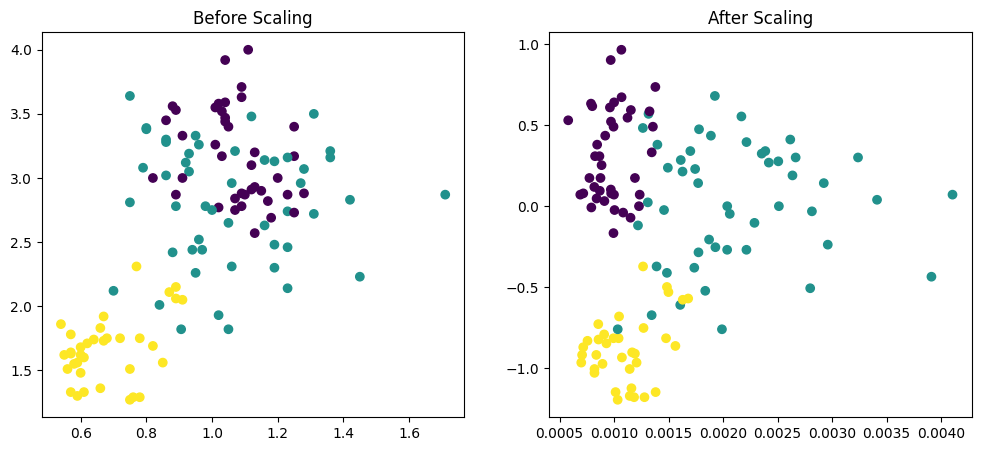

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Hue'], X_train['OD280/OD315 of diluted wines'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_normalized['Hue'], X_train_scaled['OD280/OD315 of diluted wines'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

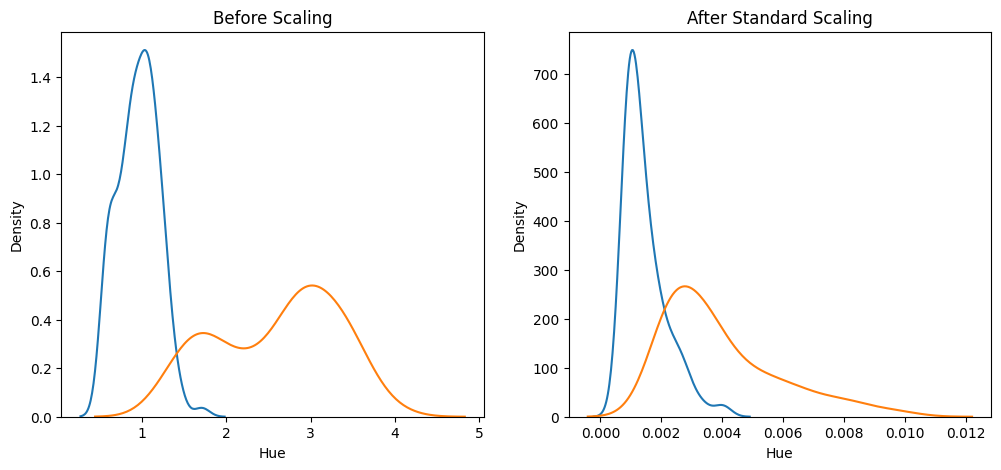

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Hue'], ax=ax1)
sns.kdeplot(X_train['OD280/OD315 of diluted wines'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_normalized['Hue'], ax=ax2)
sns.kdeplot(X_train_normalized['OD280/OD315 of diluted wines'], ax=ax2)
plt.show()


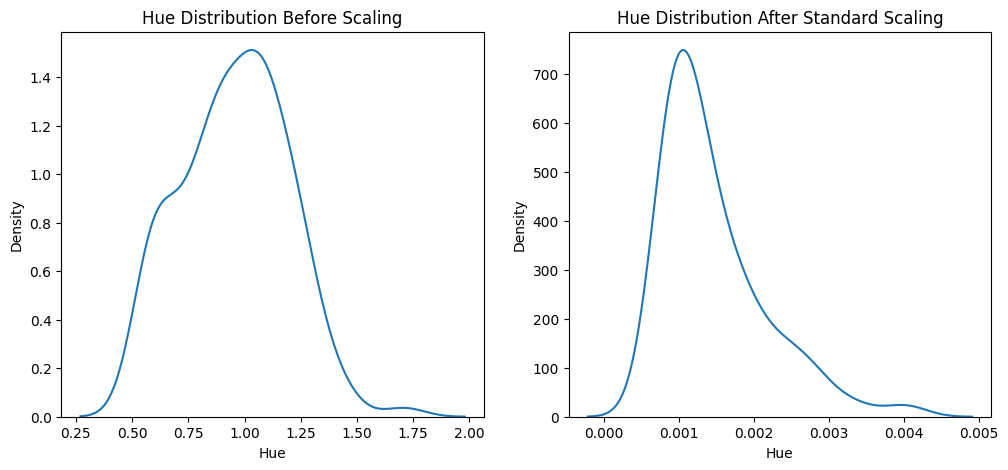

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Hue Distribution Before Scaling')
sns.kdeplot(X_train['Hue'], ax=ax1)

# after scaling
ax2.set_title('Hue Distribution After Standard Scaling')
sns.kdeplot(X_train_normalized['Hue'], ax=ax2)
plt.show()

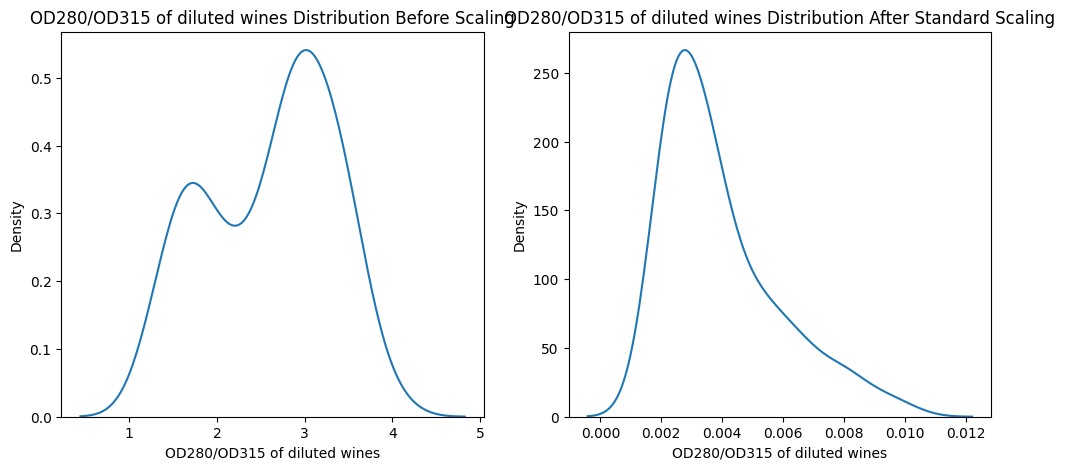

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('OD280/OD315 of diluted wines Distribution Before Scaling')
sns.kdeplot(X_train['OD280/OD315 of diluted wines'], ax=ax1)

# after scaling
ax2.set_title('OD280/OD315 of diluted wines Distribution After Standard Scaling')
sns.kdeplot(X_train_normalized['OD280/OD315 of diluted wines'], ax=ax2)
plt.show()

**Max-Abs Scaling (Maximum Absolute Scaling)**

- *Formula*: `X_scaled = X / max(|X|)`
- *Explanation*:
  - `X_scaled`: Represents the new scaled value of the original data point `X`.
  - `X`: Denotes the original data point you want to scale.
  - `max(|X|)`: Refers to the maximum absolute value in the entire column or dataset from which `X` comes.
- *Purpose*: Max-Abs Scaling scales data by dividing each data point by the maximum absolute value within the same column or dataset. This scaling method ensures that all features fall within the range [-1, 1]. It is particularly useful when you want to preserve the sign (positive or negative) of the values while scaling. Max-Abs Scaling is commonly used in situations where the sign of the data is important, such as in some machine learning algorithms or deep learning models.

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()

# Fit the scaler to the train set, it will learn the maximum absolute values
scaler.fit(X_train)

# Transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
np.round(X_train.describe(), 1)

Alcohol  Malic acid    Ash  Alcalinity of Ash  Magnesium  \
count    124.0       124.0  124.0              124.0      124.0   
mean      13.0         2.4    2.4               19.5      100.1   
std        0.8         1.1    0.3                3.6       14.7   
min       11.0         0.9    1.4               10.6       70.0   
25%       12.4         1.6    2.2               17.1       89.0   
50%       13.0         1.9    2.4               19.4       98.0   
75%       13.6         3.2    2.6               21.7      106.2   
max       14.8         5.6    3.2               30.0      162.0   

       Total Phenols  Flavanoids  Nonflavanoid Phenols  Proanthocyanins  \
count          124.0       124.0                 124.0            124.0   
mean             2.3         2.0                   0.4              1.6   
std              0.6         1.0                   0.1              0.6   
min              1.1         0.5                   0.1              0.4   
25%              1.7         1.1                   0.3              1.2   
50%              2.2         2.1                   0.3              1.6   
75%              2.7         2.8                   0.4              2.0   
max              3.9         3.7                   0.7              3.6   

       Color Intensity    Hue  OD280/OD315 of diluted wines  Proline  
count            124.0  124.0                         124.0    124.0  
mean               5.0    1.0                           2.6    746.8  
std                2.4    0.2                           0.7    308.9  
min                1.3    0.5                           1.3    312.0  
25%                3.0    0.8                           1.9    510.0  
50%                4.6    1.0                           2.8    667.5  
75%                6.4    1.1                           3.2    986.2  
max               11.8    1.7                           4.0   1547.0

In [ ]:
np.round(X_train_scaled.describe(), 1)

Alcohol  Malic acid    Ash  Alcalinity of Ash  Magnesium  \
count    124.0       124.0  124.0              124.0      124.0   
mean       0.9         0.4    0.7                0.7        0.6   
std        0.1         0.2    0.1                0.1        0.1   
min        0.7         0.2    0.4                0.4        0.4   
25%        0.8         0.3    0.7                0.6        0.5   
50%        0.9         0.3    0.7                0.6        0.6   
75%        0.9         0.6    0.8                0.7        0.7   
max        1.0         1.0    1.0                1.0        1.0   

       Total Phenols  Flavanoids  Nonflavanoid Phenols  Proanthocyanins  \
count          124.0       124.0                 124.0            124.0   
mean             0.6         0.5                   0.6              0.5   
std              0.2         0.3                   0.2              0.2   
min              0.3         0.1                   0.2              0.1   
25%              0.4         0.3                   0.4              0.3   
50%              0.6         0.6                   0.5              0.4   
75%              0.7         0.7                   0.7              0.5   
max              1.0         1.0                   1.0              1.0   

       Color Intensity    Hue  OD280/OD315 of diluted wines  Proline  
count            124.0  124.0                         124.0    124.0  
mean               0.4    0.6                           0.7      0.5  
std                0.2    0.1                           0.2      0.2  
min                0.1    0.3                           0.3      0.2  
25%                0.3    0.5                           0.5      0.3  
50%                0.4    0.6                           0.7      0.4  
75%                0.5    0.7                           0.8      0.6  
max                1.0    1.0                           1.0      1.0

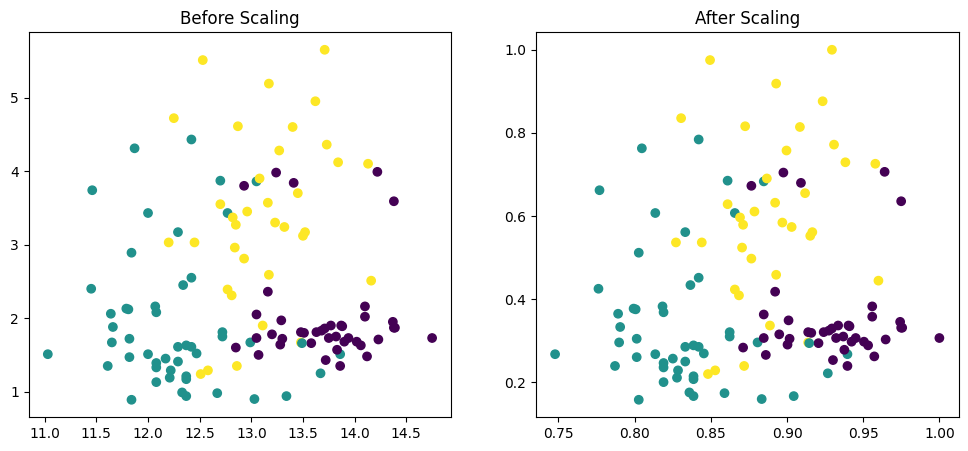

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

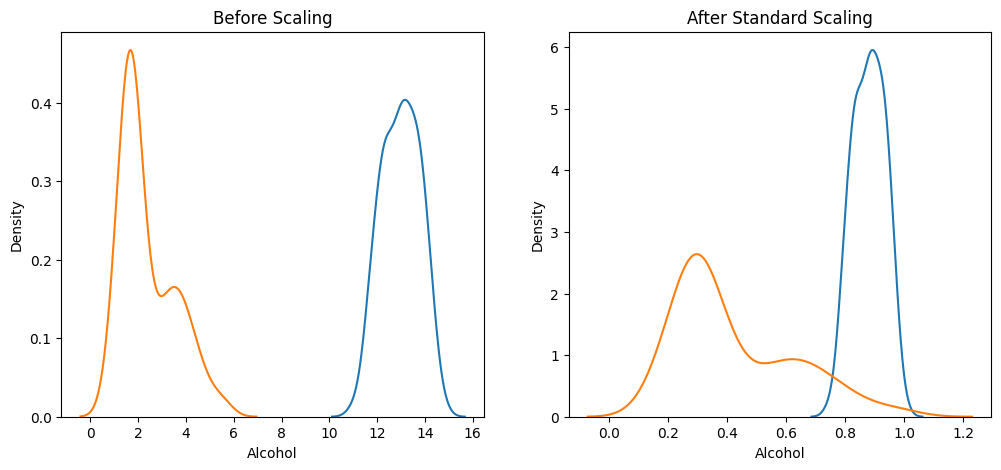

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

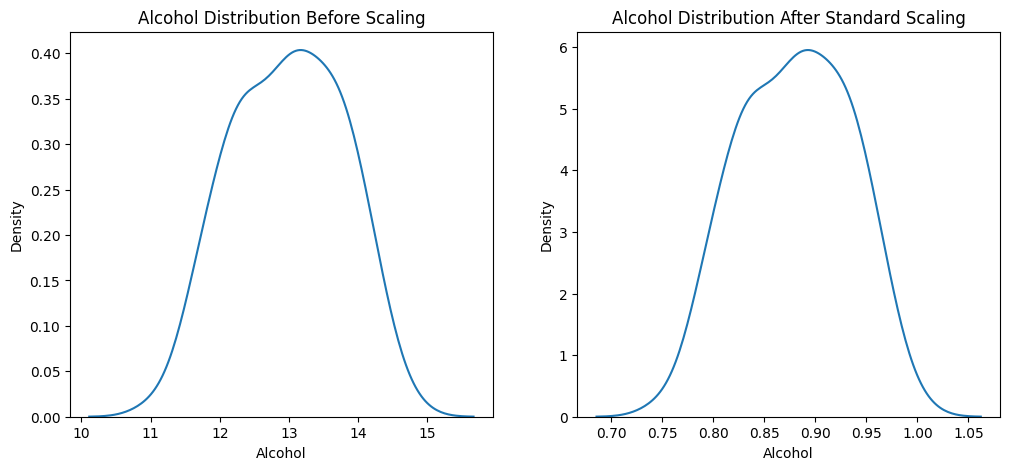

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

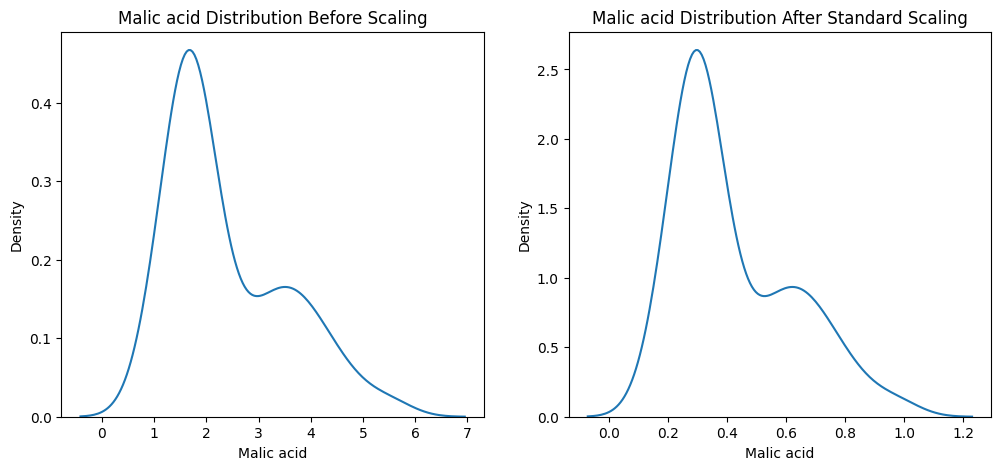

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

Here's a table that highlights the differences between various data scaling and transformation methods:

| Method                        | Formula or Procedure                                      | Use Case                        | Characteristics                                                  |
| ----------------------------- | --------------------------------------------------------- | ------------------------------- | ---------------------------------------------------------------- |
| Min-Max Scaling               | `X_normalized = (X - X_min) / (X_max - X_min)`            | Scaling features to a range    | Scales data between 0 and 1, maintains relationships between data points |
| Z-Score Standardization       | `X_standardized = (X - μ) / σ`                            | Normalizing for Gaussian data  | Transforms data to have mean (μ) of 0 and standard deviation (σ) of 1 |
| Robust Scaling                | `X_scaled = (X - median) / IQR`                           | Handling outliers                | Scales data based on median and Interquartile Range (IQR)       |
| Log Transformation           | `X_transformed = log(X)`                                  | Dealing with skewed data       | Reduces impact of skewed distributions, improves symmetry         |
| Box-Cox Transformation        | `X_transformed = (X^λ - 1) / λ`                          | Normalizing for Gaussian data  | A family of power transformations to stabilize variance          |
| Unit Vector Transformation    | `X_normalized = X / ||X||`                                | Cosine similarity calculations | Normalizes data to have a magnitude of 1, used in vector analysis |
| Max-Abs Scaling               | `X_scaled = X / max(abs(X))`                              | Maintaining relative magnitude | Scales data by the maximum absolute value, preserving ratios    |

Which method performs better depends on the specific characteristics of your data and the requirements of your analysis or modeling task. There's no one-size-fits-all answer. Here are some considerations:

1. **Min-Max Scaling**: Useful when you want to scale features to a specific range. Good when your data should be in a specific interval, e.g., [0, 1].

2. **Z-Score Standardization**: Suitable for data following a normal distribution. It centers data with mean 0 and standard deviation 1.

3. **Robust Scaling**: Great for data with outliers, as it uses the median and IQR to scale the data.

4. **Log Transformation**: Helpful for data with skewed distributions to make them more symmetric and reduce the impact of extreme values.

5. **Box-Cox Transformation**: Appropriate for data aiming for a normal distribution; it optimizes the λ parameter to achieve that.

6. **Unit Vector Transformation**: Used in vector-based analysis, e.g., cosine similarity calculations, to maintain direction while adjusting the scale.

7. **Max-Abs Scaling**: Preserves the relative magnitude of data, making it useful for cases where you want to keep the data's proportionality.

The best-performing method depends on your data and the goal of your analysis. You may need to experiment and evaluate different scaling or transformation methods to determine which one works best for your specific dataset and task.

# *Centering*

Centering is a data preprocessing technique that involves adjusting data values to have a specific reference point, typically the mean or median, at the center of the data distribution. It's often used to facilitate statistical analysis and modeling by removing the influence of a data's central tendency from the analysis.

**Mean Centering:**

*Definition*: Mean centering involves subtracting the mean (average) of the data from each data point, shifting the data distribution to have a center around zero.
   - *Formula*: `X_centered = X - mean(X)`
   - *Variable*: `X` represents the original data, and `mean(X)` is the mean of the data.

<Axes: xlabel='Alcohol', ylabel='Density'>

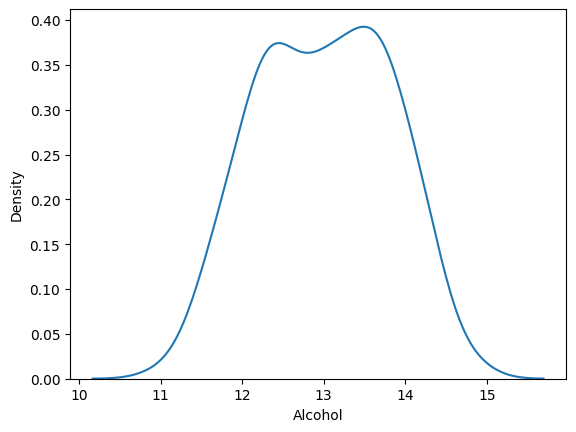

In [ ]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

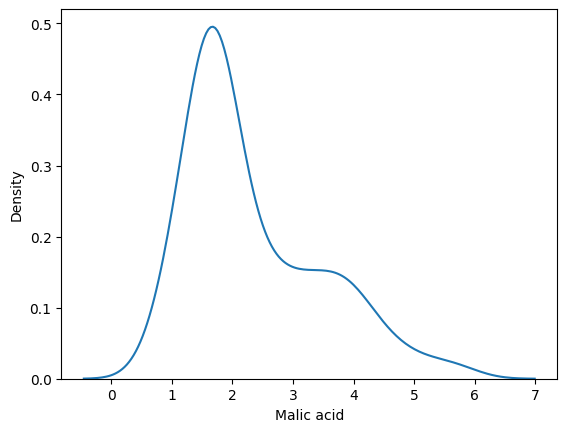

In [ ]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

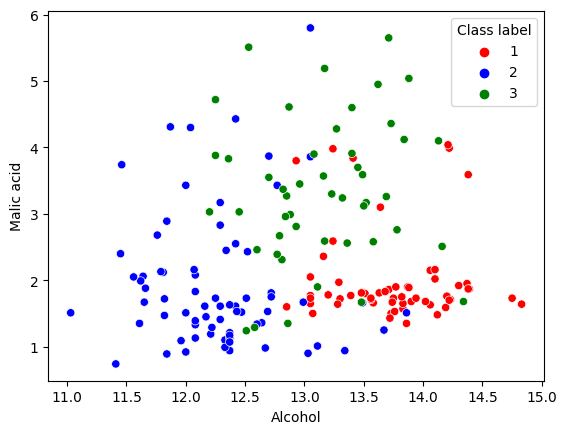

In [ ]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(data=df, x='Alcohol', y='Malic acid' ,hue=df['Class label'],palette=color_dict)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                    df['Class label'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((124, 13), (54, 13))

In [ ]:
# Calculate the mean of the training data
mean_X_train = X_train.mean()

# Subtract the mean from the training and test sets
X_train_centered = X_train - mean_X_train
X_test_centered = X_test - mean_X_train


In [ ]:
X_train_centered = pd.DataFrame(X_train_centered, columns=X_train.columns)
X_test_centered = pd.DataFrame(X_test_centered, columns=X_test.columns)

In [ ]:
np.round(X_train.describe(), 1)

Alcohol  Malic acid    Ash  Alcalinity of Ash  Magnesium  \
count    124.0       124.0  124.0              124.0      124.0   
mean      13.0         2.4    2.4               19.5      100.1   
std        0.8         1.1    0.3                3.6       14.7   
min       11.0         0.9    1.4               10.6       70.0   
25%       12.4         1.6    2.2               17.1       89.0   
50%       13.0         1.9    2.4               19.4       98.0   
75%       13.6         3.2    2.6               21.7      106.2   
max       14.8         5.6    3.2               30.0      162.0   

       Total Phenols  Flavanoids  Nonflavanoid Phenols  Proanthocyanins  \
count          124.0       124.0                 124.0            124.0   
mean             2.3         2.0                   0.4              1.6   
std              0.6         1.0                   0.1              0.6   
min              1.1         0.5                   0.1              0.4   
25%              1.7         1.1                   0.3              1.2   
50%              2.2         2.1                   0.3              1.6   
75%              2.7         2.8                   0.4              2.0   
max              3.9         3.7                   0.7              3.6   

       Color Intensity    Hue  OD280/OD315 of diluted wines  Proline  
count            124.0  124.0                         124.0    124.0  
mean               5.0    1.0                           2.6    746.8  
std                2.4    0.2                           0.7    308.9  
min                1.3    0.5                           1.3    312.0  
25%                3.0    0.8                           1.9    510.0  
50%                4.6    1.0                           2.8    667.5  
75%                6.4    1.1                           3.2    986.2  
max               11.8    1.7                           4.0   1547.0

In [ ]:
np.round(X_train_centered.describe(), 1)

Alcohol  Malic acid    Ash  Alcalinity of Ash  Magnesium  \
count    124.0       124.0  124.0              124.0      124.0   
mean      -0.0        -0.0   -0.0               -0.0       -0.0   
std        0.8         1.1    0.3                3.6       14.7   
min       -2.0        -1.5   -1.0               -8.9      -30.1   
25%       -0.6        -0.8   -0.1               -2.5      -11.1   
50%        0.1        -0.5   -0.0               -0.1       -2.1   
75%        0.7         0.9    0.2                2.2        6.2   
max        1.8         3.3    0.9               10.5       61.9   

       Total Phenols  Flavanoids  Nonflavanoid Phenols  Proanthocyanins  \
count          124.0       124.0                 124.0            124.0   
mean            -0.0         0.0                  -0.0             -0.0   
std              0.6         1.0                   0.1              0.6   
min             -1.2        -1.5                  -0.2             -1.2   
25%             -0.5        -0.9                  -0.1             -0.4   
50%             -0.1         0.1                  -0.0             -0.1   
75%              0.4         0.8                   0.1              0.3   
max              1.6         1.8                   0.3              2.0   

       Color Intensity    Hue  OD280/OD315 of diluted wines  Proline  
count            124.0  124.0                         124.0    124.0  
mean               0.0   -0.0                          -0.0      0.0  
std                2.4    0.2                           0.7    308.9  
min               -3.7   -0.4                          -1.3   -434.8  
25%               -1.9   -0.2                          -0.7   -236.8  
50%               -0.4    0.0                           0.2    -79.3  
75%                1.4    0.2                           0.6    239.5  
max                6.8    0.8                           1.4    800.2

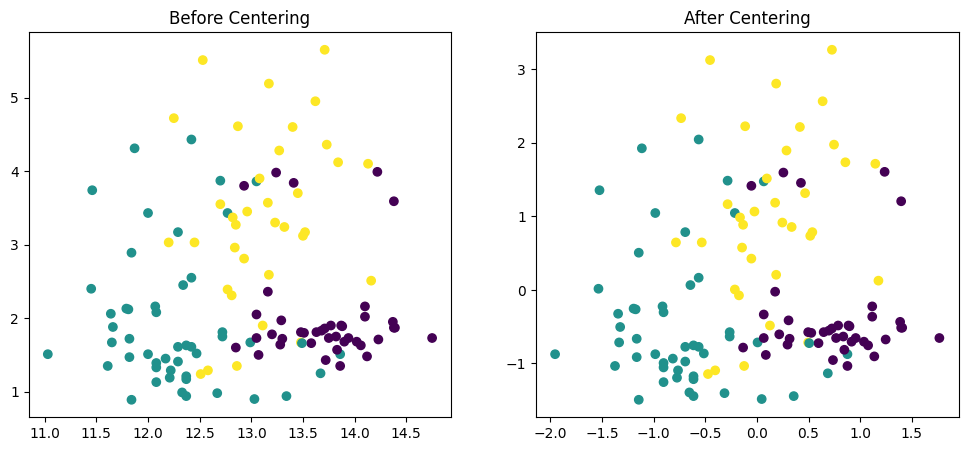

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Centering")
ax2.scatter(X_train_centered['Alcohol'], X_train_centered['Malic acid'],c=y_train)
ax2.set_title("After Centering")
plt.show()

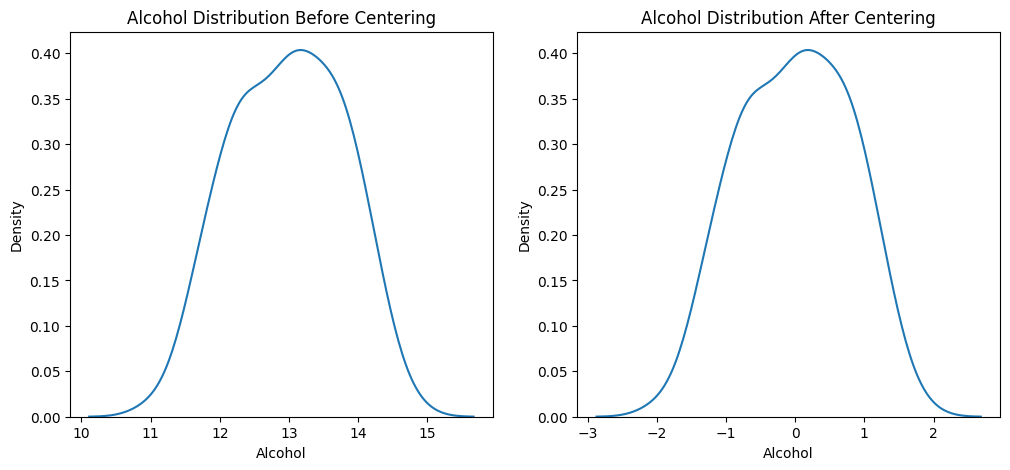

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Centering')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Centering')
sns.kdeplot(X_train_centered['Alcohol'], ax=ax2)
plt.show()

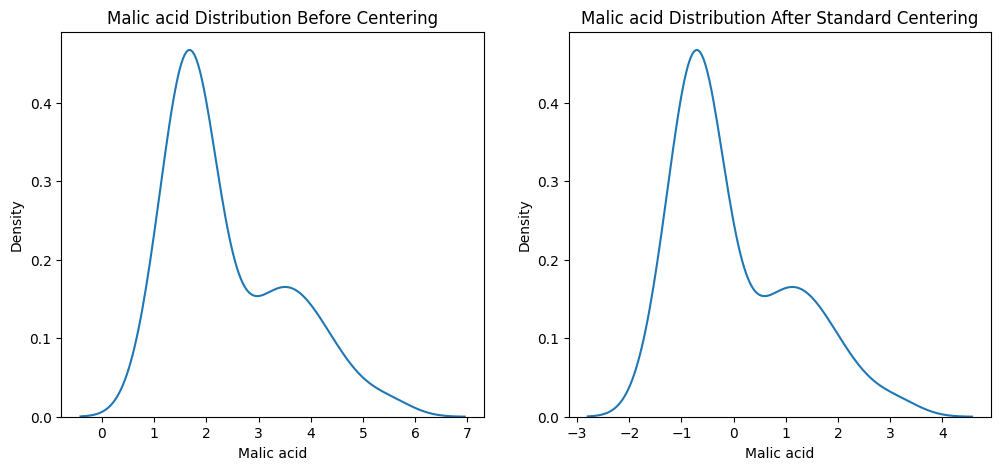

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Centering')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Centering')
sns.kdeplot(X_train_centered['Malic acid'], ax=ax2)
plt.show()

**Median Centering:**

  - *Definition*: Median centering subtracts the median value from each data point, centering the data around the median.
   - *Formula*: `X_centered = X - median(X)`
   - *Variable*: `X` represents the original data, and `median(X)` is the median of the data.

<Axes: xlabel='Magnesium', ylabel='Density'>

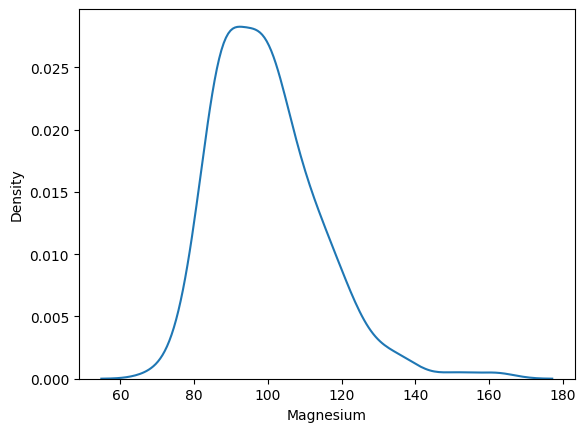

In [ ]:
sns.kdeplot(df['Magnesium'])

<Axes: xlabel='Color Intensity', ylabel='Density'>

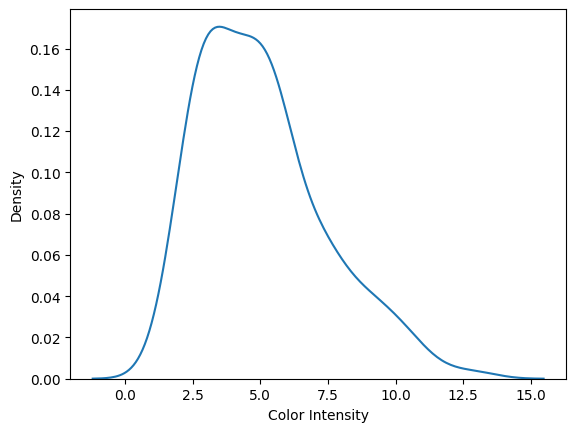

In [ ]:
sns.kdeplot(df['Color Intensity'])

<Axes: xlabel='Magnesium', ylabel='Color Intensity'>

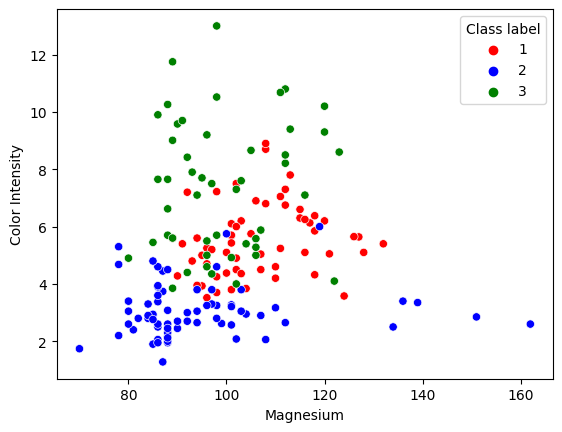

In [ ]:
import seaborn as sns

color_dict = {1: 'red', 3: 'green', 2: 'blue'}
sns.scatterplot(data=df, x='Magnesium', y='Color Intensity', hue='Class label', palette=color_dict)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                    df['Class label'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((124, 13), (54, 13))

In [ ]:
# Calculate the median of the training data
median_X_train = X_train.median()

# Subtract the median from the training and test sets
X_train_centered = X_train - median_X_train
X_test_centered = X_test - median_X_train


In [ ]:
X_train_centered = pd.DataFrame(X_train_centered, columns=X_train.columns)
X_test_centered = pd.DataFrame(X_test_centered, columns=X_test.columns)

In [ ]:
np.round(X_train.describe(), 1)

Alcohol  Malic acid    Ash  Alcalinity of Ash  Magnesium  \
count    124.0       124.0  124.0              124.0      124.0   
mean      13.0         2.4    2.4               19.5      100.1   
std        0.8         1.1    0.3                3.6       14.7   
min       11.0         0.9    1.4               10.6       70.0   
25%       12.4         1.6    2.2               17.1       89.0   
50%       13.0         1.9    2.4               19.4       98.0   
75%       13.6         3.2    2.6               21.7      106.2   
max       14.8         5.6    3.2               30.0      162.0   

       Total Phenols  Flavanoids  Nonflavanoid Phenols  Proanthocyanins  \
count          124.0       124.0                 124.0            124.0   
mean             2.3         2.0                   0.4              1.6   
std              0.6         1.0                   0.1              0.6   
min              1.1         0.5                   0.1              0.4   
25%              1.7         1.1                   0.3              1.2   
50%              2.2         2.1                   0.3              1.6   
75%              2.7         2.8                   0.4              2.0   
max              3.9         3.7                   0.7              3.6   

       Color Intensity    Hue  OD280/OD315 of diluted wines  Proline  
count            124.0  124.0                         124.0    124.0  
mean               5.0    1.0                           2.6    746.8  
std                2.4    0.2                           0.7    308.9  
min                1.3    0.5                           1.3    312.0  
25%                3.0    0.8                           1.9    510.0  
50%                4.6    1.0                           2.8    667.5  
75%                6.4    1.1                           3.2    986.2  
max               11.8    1.7                           4.0   1547.0

In [ ]:
np.round(X_train_centered.describe(), 1)

Alcohol  Malic acid    Ash  Alcalinity of Ash  Magnesium  \
count    124.0       124.0  124.0              124.0      124.0   
mean      -0.1         0.5    0.0                0.1        2.1   
std        0.8         1.1    0.3                3.6       14.7   
min       -2.0        -1.0   -1.0               -8.8      -28.0   
25%       -0.7        -0.3   -0.1               -2.4       -9.0   
50%        0.0         0.0    0.0                0.0        0.0   
75%        0.6         1.4    0.2                2.3        8.2   
max        1.7         3.8    0.9               10.6       64.0   

       Total Phenols  Flavanoids  Nonflavanoid Phenols  Proanthocyanins  \
count          124.0       124.0                 124.0            124.0   
mean             0.1        -0.1                   0.0              0.1   
std              0.6         1.0                   0.1              0.6   
min             -1.1        -1.6                  -0.2             -1.1   
25%             -0.5        -1.0                  -0.1             -0.3   
50%              0.0         0.0                   0.0             -0.0   
75%              0.5         0.7                   0.1              0.4   
max              1.7         1.7                   0.3              2.0   

       Color Intensity    Hue  OD280/OD315 of diluted wines  Proline  
count            124.0  124.0                         124.0    124.0  
mean               0.4   -0.0                          -0.2     79.3  
std                2.4    0.2                           0.7    308.9  
min               -3.3   -0.4                          -1.5   -355.5  
25%               -1.5   -0.2                          -0.9   -157.5  
50%                0.0    0.0                           0.0      0.0  
75%                1.8    0.2                           0.4    318.8  
max                7.2    0.8                           1.2    879.5

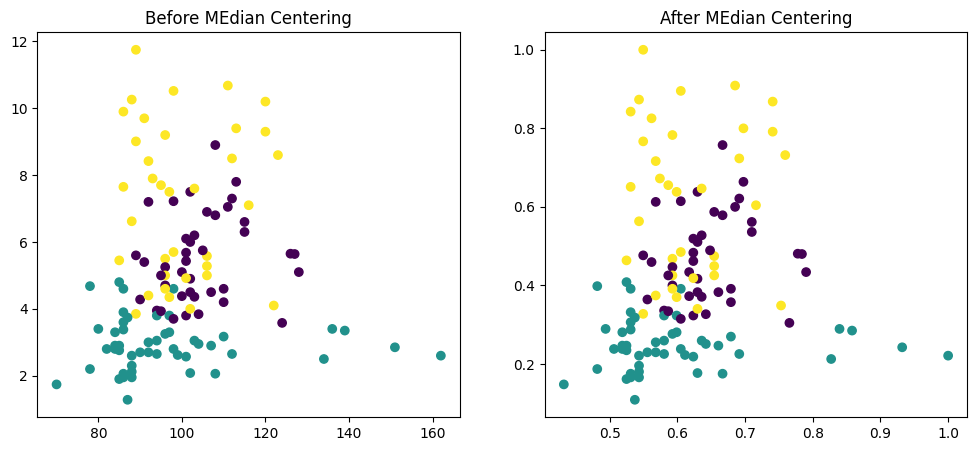

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Magnesium'], X_train['Color Intensity'],c=y_train)
ax1.set_title("Before MEdian Centering")
ax2.scatter(X_train_scaled['Magnesium'], X_train_scaled['Color Intensity'],c=y_train)
ax2.set_title("After MEdian Centering")
plt.show()

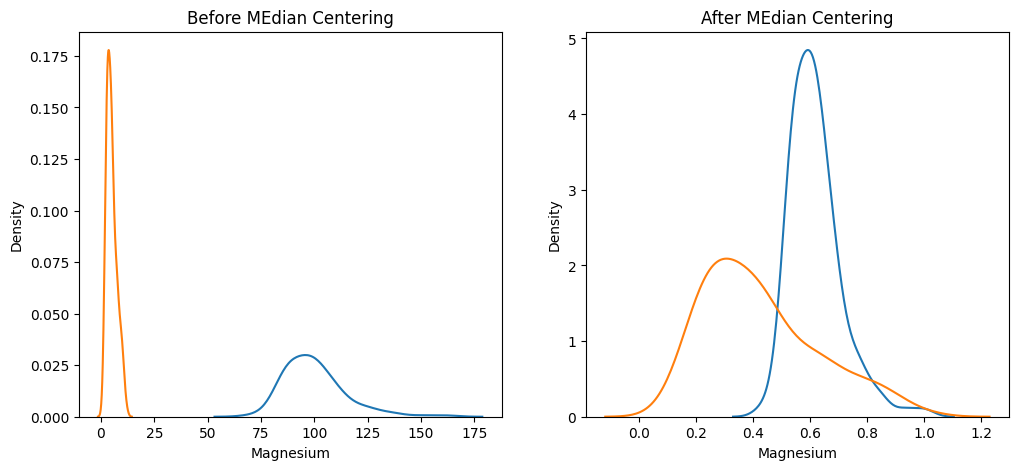

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before MEdian Centering')
sns.kdeplot(X_train['Magnesium'], ax=ax1)
sns.kdeplot(X_train['Color Intensity'], ax=ax1)

# after scaling
ax2.set_title('After MEdian Centering')
sns.kdeplot(X_train_scaled['Magnesium'], ax=ax2)
sns.kdeplot(X_train_scaled['Color Intensity'], ax=ax2)
plt.show()

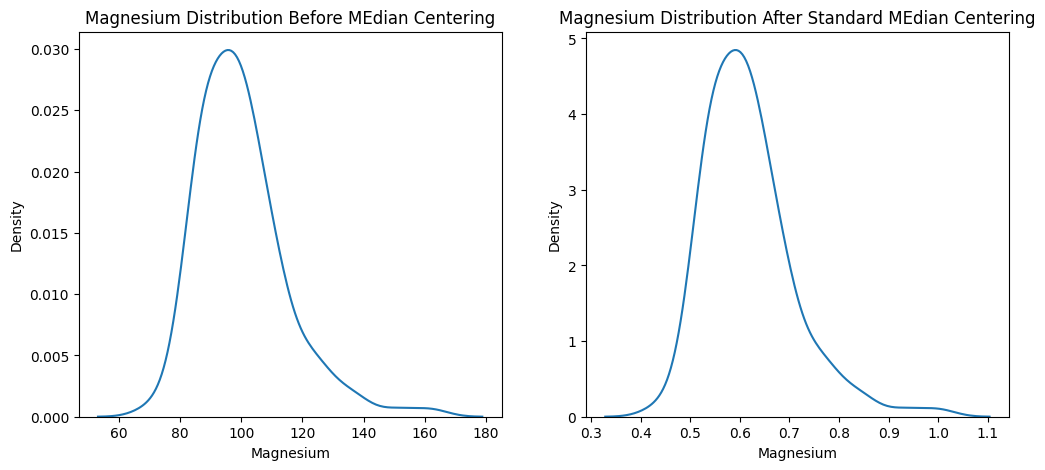

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Magnesium Distribution Before MEdian Centering')
sns.kdeplot(X_train['Magnesium'], ax=ax1)

# after scaling
ax2.set_title('Magnesium Distribution After Standard MEdian Centering')
sns.kdeplot(X_train_scaled['Magnesium'], ax=ax2)
plt.show()

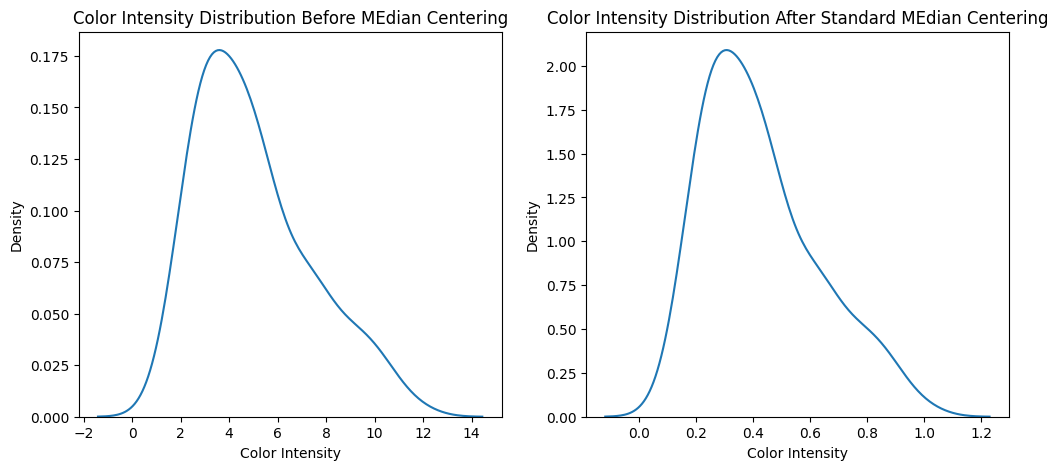

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Color Intensity Distribution Before MEdian Centering')
sns.kdeplot(X_train['Color Intensity'], ax=ax1)

# after scaling
ax2.set_title('Color Intensity Distribution After Standard MEdian Centering')
sns.kdeplot(X_train_scaled['Color Intensity'], ax=ax2)
plt.show()

**Grand Mean Centering:**

   - *Definition*: Grand mean centering is used when you have data from multiple groups or conditions. It subtracts the grand mean (the mean of all data points across groups) from each data point.
   - *Formula*: `X_centered = X - grand_mean(X)`
   - *Variable*: `X` represents the data for each group, and `grand_mean(X)` is the mean of all data points across groups.

<Axes: xlabel='Ash', ylabel='Density'>

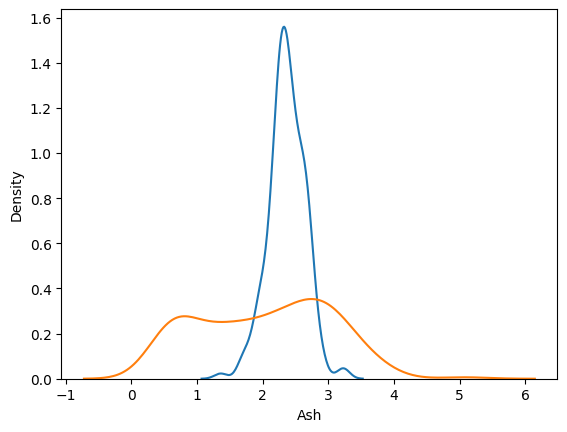

In [ ]:
sns.kdeplot(df['Ash'])
sns.kdeplot(df['Flavanoids'])

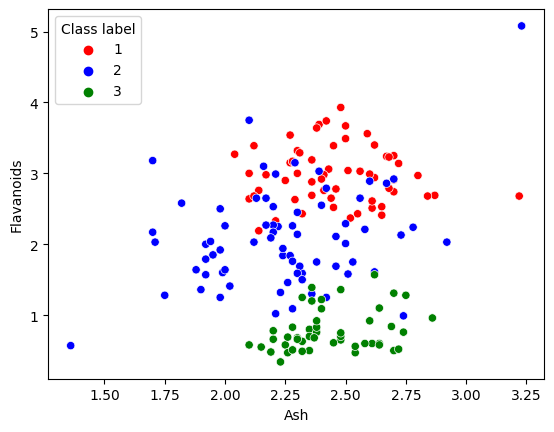

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have imported your DataFrame 'df' correctly

color_dict = {1: 'red', 3: 'green', 2: 'blue'}
sns.scatterplot(x=df['Ash'], y=df['Flavanoids'], hue=df['Class label'], palette=color_dict)

plt.show()  # This line is required to display the plot


In [ ]:
X_train_centered = pd.DataFrame(X_train_centered, columns=X_train.columns)
X_test_centered = pd.DataFrame(X_test_centered, columns=X_test.columns)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                    df['Class label'],
                                                    test_size=0.3,
                                                    random_state=0)

In [ ]:
# Calculate the grand mean of the entire dataset
grand_mean_X = X.mean()

# Subtract the grand mean from the training and test sets
X_train_centered = X_train - grand_mean_X
X_test_centered = X_test - grand_mean_X


In [ ]:
X_train_centered = pd.DataFrame(X_train_centered, columns=X_train.columns)
X_test_centered = pd.DataFrame(X_test_centered, columns=X_test.columns)

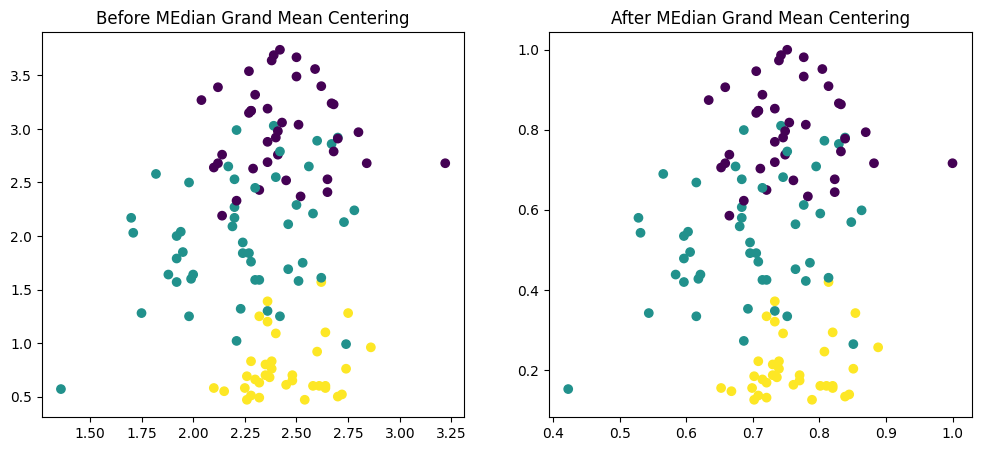

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Ash'], X_train['Flavanoids'],c=y_train)
ax1.set_title("Before MEdian Grand Mean Centering")
ax2.scatter(X_train_scaled['Ash'], X_train_scaled['Flavanoids'],c=y_train)
ax2.set_title("After MEdian Grand Mean Centering")
plt.show()


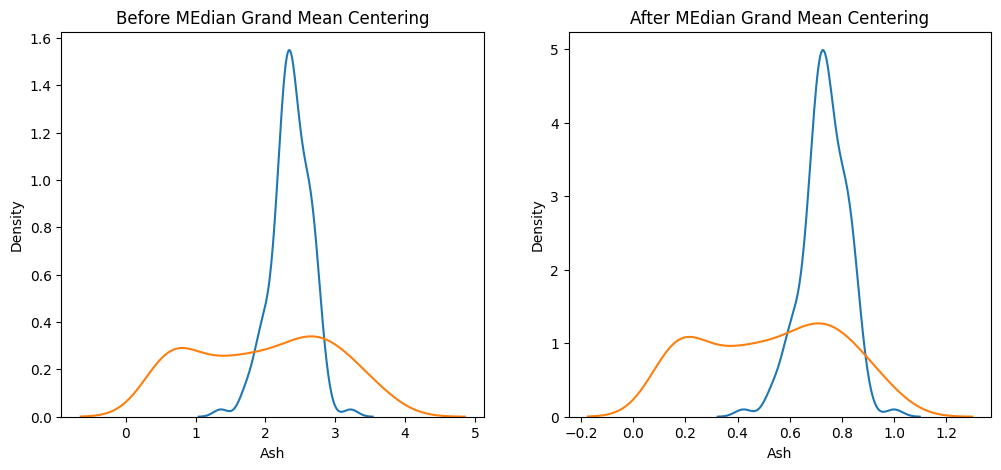

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before MEdian Grand Mean Centering')
sns.kdeplot(X_train['Ash'], ax=ax1)
sns.kdeplot(X_train['Flavanoids'], ax=ax1)

# after scaling
ax2.set_title('After MEdian Grand Mean Centering')
sns.kdeplot(X_train_scaled['Ash'], ax=ax2)
sns.kdeplot(X_train_scaled['Flavanoids'], ax=ax2)
plt.show()

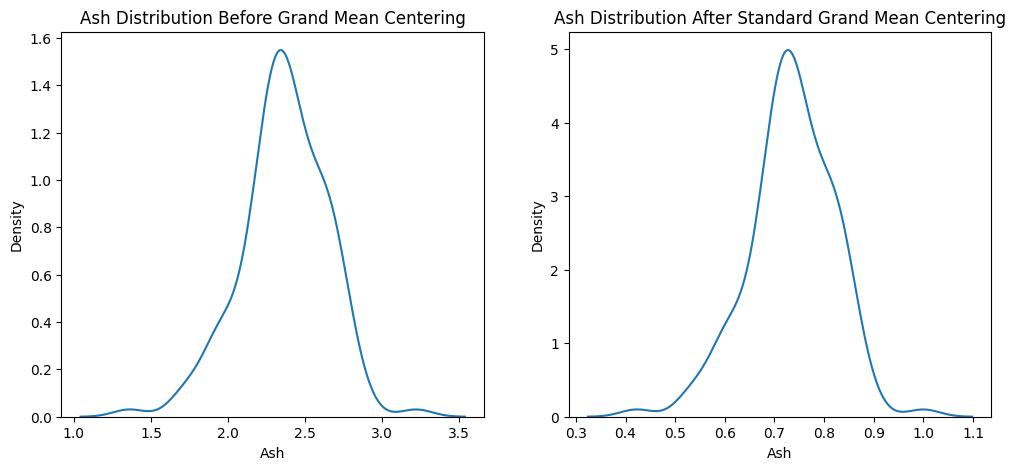

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Ash Distribution Before Grand Mean Centering')
sns.kdeplot(X_train['Ash'], ax=ax1)

# after scaling
ax2.set_title('Ash Distribution After Standard Grand Mean Centering')
sns.kdeplot(X_train_scaled['Ash'], ax=ax2)
plt.show()

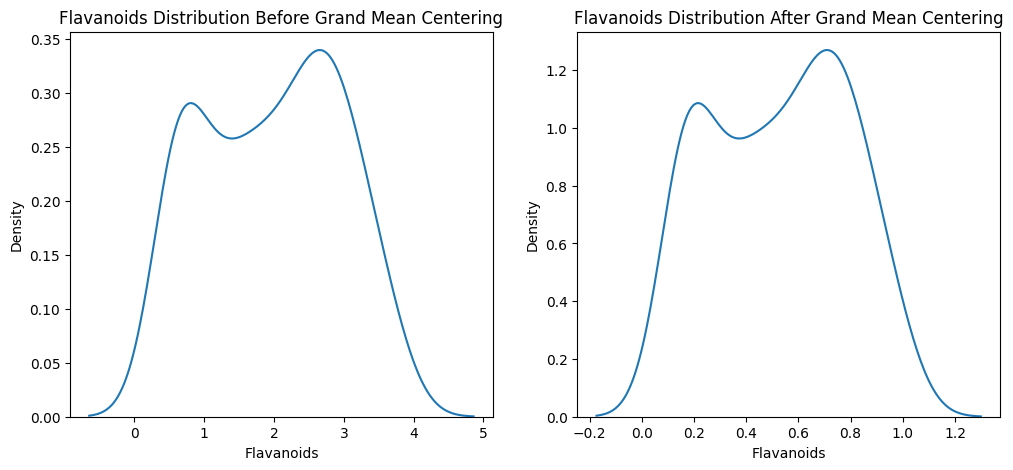

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Flavanoids Distribution Before Grand Mean Centering')
sns.kdeplot(X_train['Flavanoids'], ax=ax1)

# after scaling
ax2.set_title('Flavanoids Distribution After Grand Mean Centering')
sns.kdeplot(X_train_scaled['Flavanoids'], ax=ax2)
plt.show()

**Range Centering:**

   - *Definition*: Range centering scales and shifts the data to fit within a specific range (e.g., [0, 1] or [-1, 1]).
   - *Formula*: `X_centered = (X - min(X)) / (max(X) - min(X))`
   - *Variables*: `X` is the original data, `min(X)` is the minimum value, and `max(X)` is the maximum value.


<Axes: xlabel='Alcohol', ylabel='Density'>

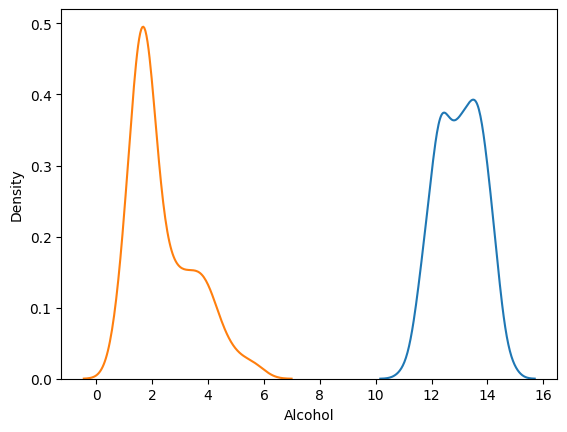

In [ ]:
sns.kdeplot(df['Alcohol'])
sns.kdeplot(df['Malic acid'])

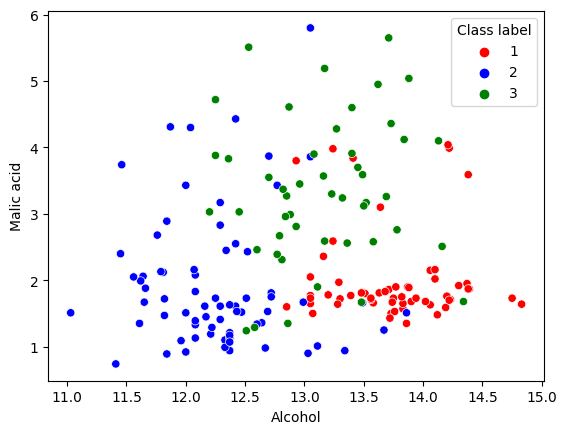

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have imported your DataFrame 'df' correctly

color_dict = {1: 'red', 3: 'green', 2: 'blue'}
sns.scatterplot(x=df['Alcohol'], y=df['Malic acid'], hue=df['Class label'], palette=color_dict)

plt.show()  # This line is required to display the plot

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                    df['Class label'],
                                                    test_size=0.3,
                                                    random_state=0)

In [ ]:
X_train_centered = pd.DataFrame(X_train_centered, columns=X_train.columns)
X_test_centered = pd.DataFrame(X_test_centered, columns=X_test.columns)

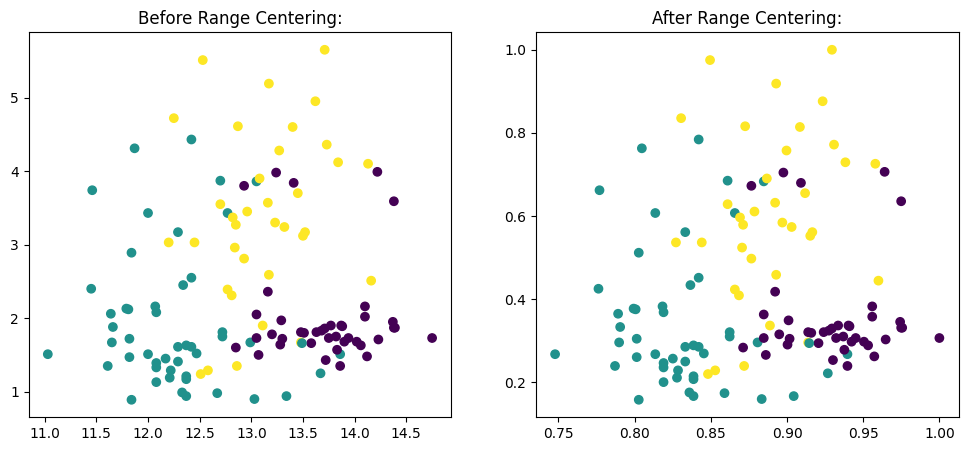

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Range Centering:")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Range Centering:")
plt.show()

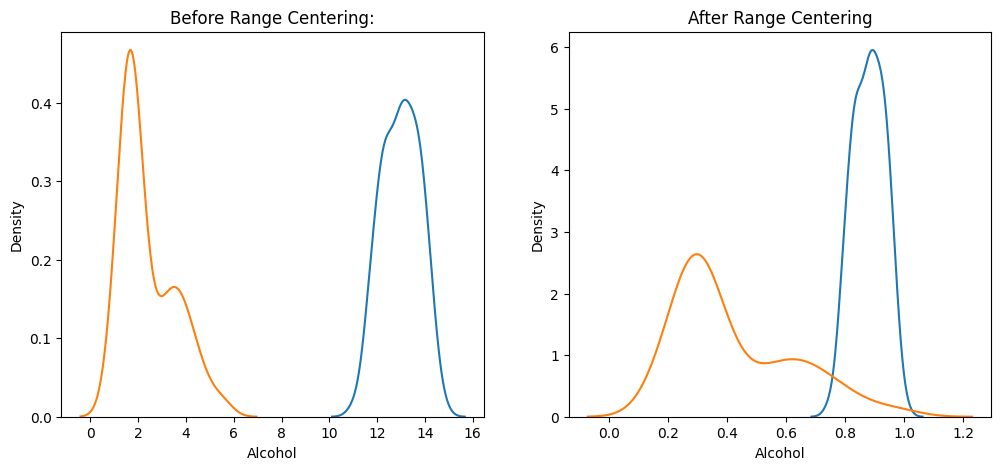

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Range Centering:')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Range Centering')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

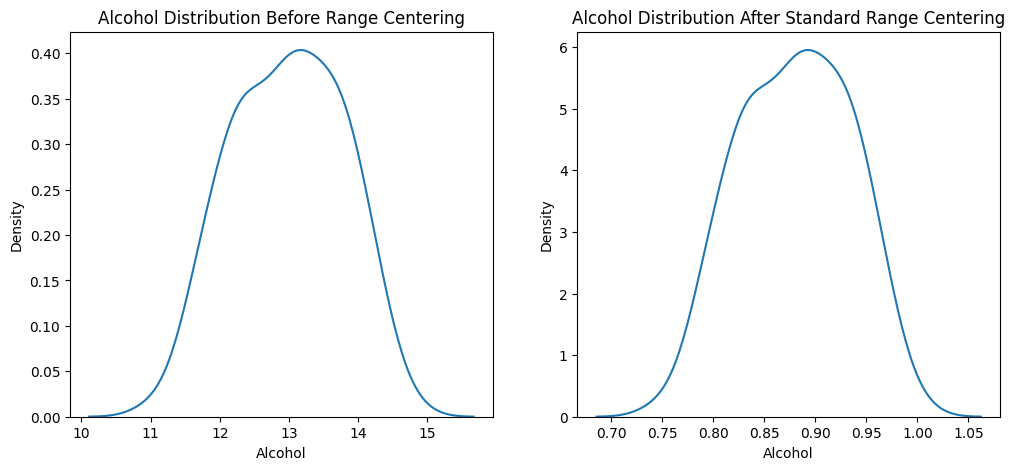

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Range Centering')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Range Centering')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

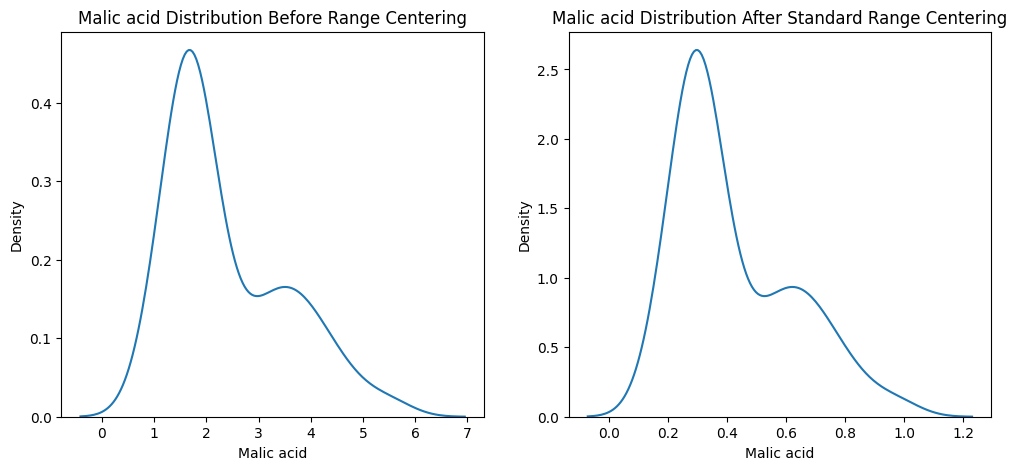

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Range Centering')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Range Centering')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

**Custom Centering:**

 - *Definition*: Custom centering allows you to subtract a user-defined value from each data point, offering flexibility in centering based on specific requirements.
   - *Formula*: `X_centered = X - c`
   - *Variables*: `X` represents the original data, and `c` is the user-defined centering value.

<Axes: xlabel='Alcohol', ylabel='Density'>

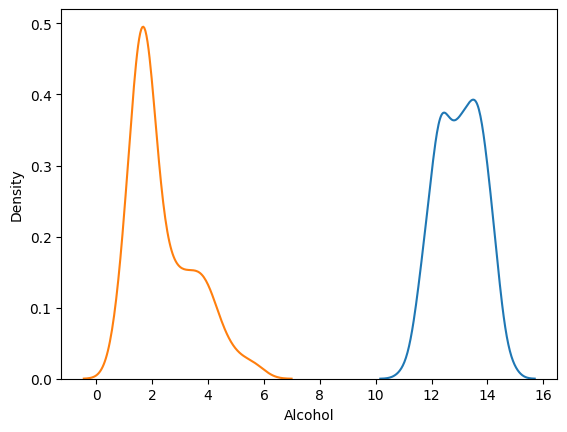

In [ ]:
sns.kdeplot(df['Alcohol'])
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

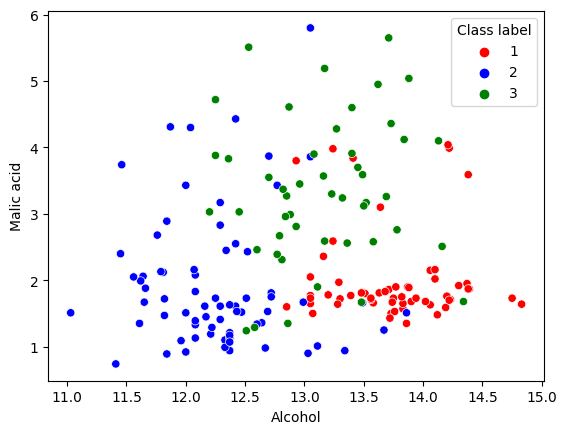

In [ ]:
import seaborn as sns

color_dict = {1: 'red', 3: 'green', 2: 'blue'}
sns.scatterplot(x=df['Alcohol'], y=df['Malic acid'], hue=df['Class label'], palette=color_dict)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                    df['Class label'],
                                                    test_size=0.3,
                                                    random_state=0)

In [ ]:
c = 4.9  # Replace 'your_custom_value' with the value you want to subtract

# Subtract the custom value from the training and test sets
X_train_centered = X_train - c
X_test_centered = X_test - c


In [ ]:
X_train_centered = pd.DataFrame(X_train_centered, columns=X_train.columns)
X_test_centered = pd.DataFrame(X_test_centered, columns=X_test.columns)

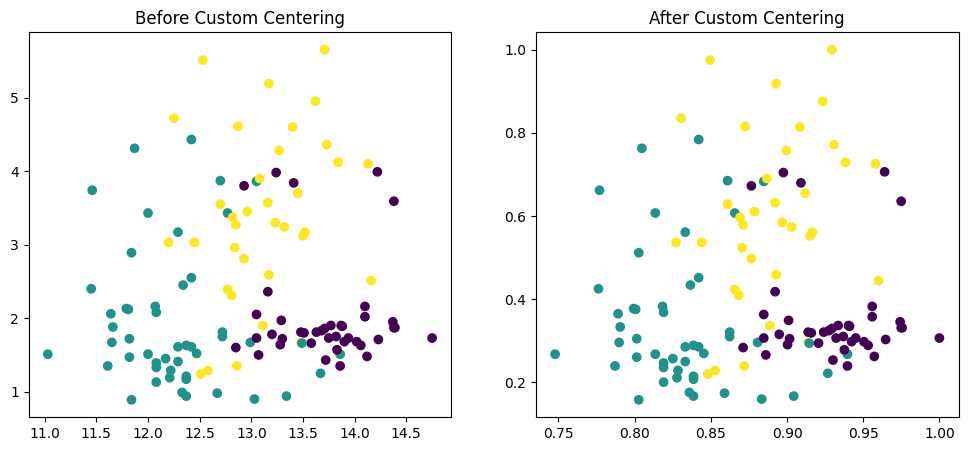

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Custom Centering")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Custom Centering")
plt.show()

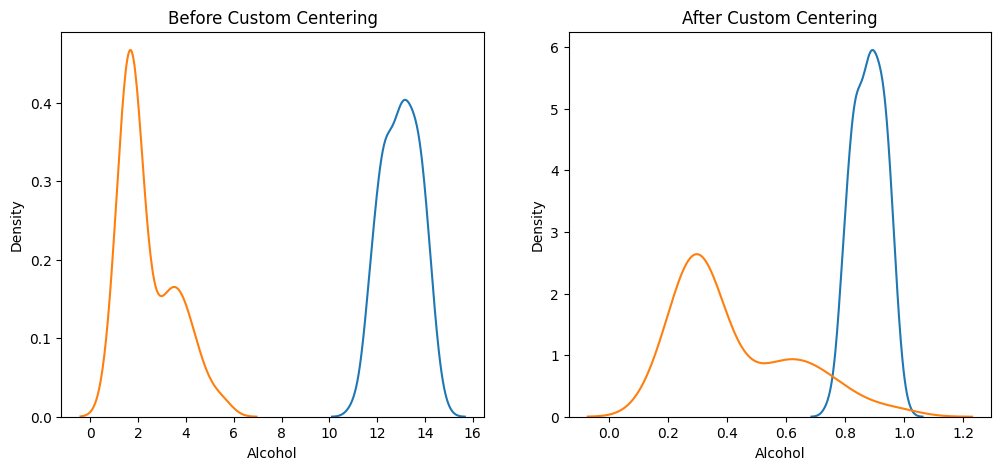

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Custom Centering')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Custom Centering')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

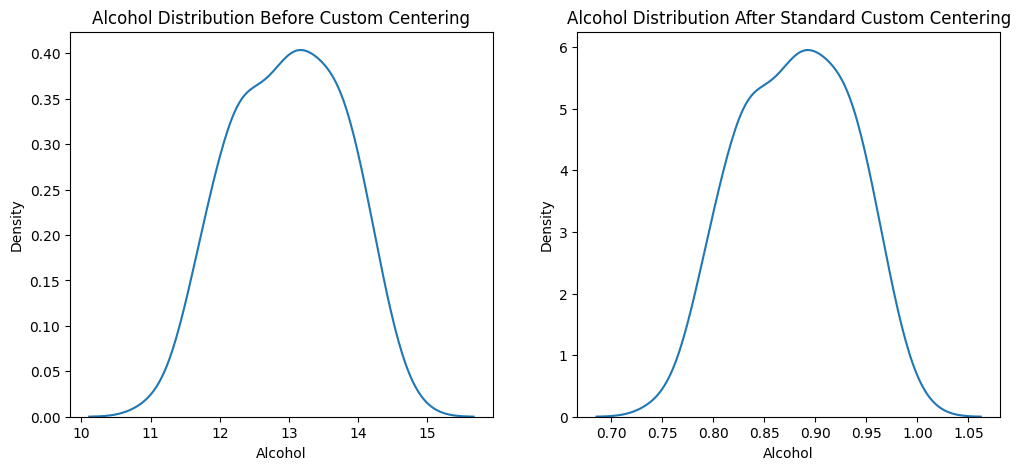

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Custom Centering')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Custom Centering')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

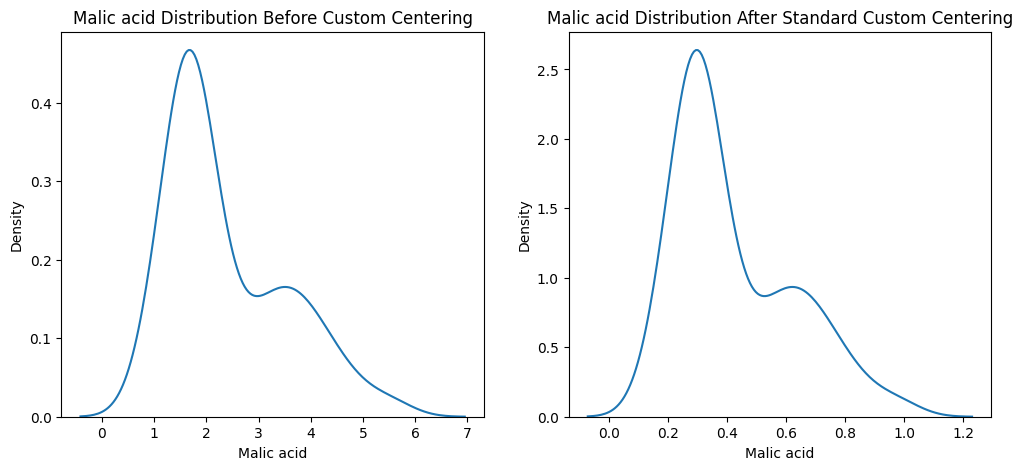

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Custom Centering')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Custom Centering')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

Here's a table summarizing the different centering methods, their formulas, and the typical use cases:

| Centering Method             | Formula                 | Typical Use Cases                                    |
|-----------------------------|-------------------------|-------------------------------------------------------|
| Mean Centering              | X_centered = X - mean(X) | Removing the mean or centering data around zero.     |
| Median Centering            | X_centered = X - median(X) | Centering data around the median for non-normal distributions.  |
| Grand Mean Centering        | X_centered = X - grand_mean(X) | Used in ANOVA to compare group means.               |
| Range Centering             | X_centered = (X - min(X)) / (max(X) - min(X)) | Scaling and shifting data to a specific range.       |
| Custom Centering            | X_centered = X - c       | User-defined centering value.                         |

The choice of which centering method works better depends on the specific characteristics of the data and the goals of the analysis:

- **Mean Centering** is suitable when you want to remove the influence of the mean and center data around zero, often used in regression modeling.
- **Median Centering** is effective for non-normally distributed data, where the median provides a robust measure of central tendency.
- **Grand Mean Centering** is used in ANOVA and similar group comparisons where you want to center data around the grand mean.
- **Range Centering** is used to scale and shift data to a specific range, making it useful for some applications but not for central tendency.
- **Custom Centering** is flexible and allows you to center data based on user-defined values, but its effectiveness depends on your specific requirements.

The "better" centering method depends on the specific context and the goals of your analysis. Each method has its own advantages and is chosen based on the nature of the data and the statistical or modeling techniques being used.

In [ ]:
import pandas as pd
data = pd.DataFrame({'Color': ['Red', 'Blue', 'Green', 'Red', 'Green']})
one_hot_encoded = pd.get_dummies(data['Color'], prefix='Color')
data = pd.concat([data, one_hot_encoded], axis=1)
print(data)


   Color  Color_Blue  Color_Green  Color_Red
0    Red           0            0          1
1   Blue           1            0          0
2  Green           0            1          0
3    Red           0            0          1
4  Green           0            1          0


In [ ]:
import pandas as pd
data = pd.DataFrame({'City': ['New York', 'Los Angeles', 'Chicago', 'New York', 'Chicago'],
                     'Population': [8.4, 3.9, 2.7, 8.4, 2.7],
                     'AverageIncome': [50000, 60000, 55000, 50000, 55000]})
means = data.groupby('City')['Population'].mean()
data['City_TargetEncoded'] = data['City'].map(means)
print(data)


          City  Population  AverageIncome  City_TargetEncoded
0     New York         8.4          50000                 8.4
1  Los Angeles         3.9          60000                 3.9
2      Chicago         2.7          55000                 2.7
3     New York         8.4          50000                 8.4
4      Chicago         2.7          55000                 2.7


In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(input_dim=100, output_dim=32, input_length=10))

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
import numpy as np

# Create a model
model = Sequential()
model.add(Embedding(input_dim=100, output_dim=32, input_length=10))

# Compile the model (you need to specify a loss function, optimizer, etc., depending on your specific task)
model.compile(loss='mean_squared_error', optimizer='adam')

# Create some sample input data
input_data = np.random.randint(0, 100, (1, 10))  # Replace with your actual input data

# Use the model to predict the output
output = model.predict(input_data)

print("Output Shape:", output.shape)
print("Output:")
print(output)

1/1 [==============================] - 0s 89ms/step
Output Shape: (1, 10, 32)
Output:
[[[ 0.03787365  0.00307221  0.00470395 -0.01225192  0.00259131
    0.04124295 -0.02665073  0.00216486  0.03173042  0.02591691
   -0.04104431 -0.0363783   0.03358892 -0.03571051 -0.04243134
   -0.04424925 -0.03362175 -0.0015633   0.04452986 -0.022798
   -0.02987671  0.04435346 -0.03825805 -0.01470106 -0.0091175
   -0.00214862  0.01014563  0.02757536  0.0189597   0.02352693
    0.03853692  0.03535987]
  [-0.04698075 -0.00549805 -0.04984067  0.02776313 -0.00761158
    0.04093236 -0.03120092 -0.02646973 -0.01935643 -0.01580264
    0.0119705  -0.01161043  0.0382604  -0.03401864 -0.03063223
   -0.01446078 -0.01829367 -0.00493383  0.04155609 -0.02790896
   -0.02733005  0.04820294  0.02837416 -0.00828446  0.01144243
   -0.00872428  0.00199974 -0.01942637 -0.02234645 -0.04600481
    0.03740506 -0.00409366]
  [-0.03440658 -0.03521923 -0.02233315 -0.02630694 -0.02459087
    0.00887742 -0.00500696 -0.00997866 -0.

In [ ]:
import pandas as pd
data = pd.DataFrame({'Size': ['Small', 'Medium', 'Large', 'Small', 'Large']})
data['Size_LabelEncoded'] = data['Size'].astype('category').cat.codes
print(data)


     Size  Size_LabelEncoded
0   Small                  2
1  Medium                  1
2   Large                  0
3   Small                  2
4   Large                  0


In [ ]:
#Import Red Juice Dataset
df = pd.read_csv('/content/drive/MyDrive/AI_Project/winequality-red.csv' , delimiter =";")
df.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5